# Exploratory Analysis
# Análise Exploratória


### Loading data
### Carregando os dados


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.metrics import silhouette_score
import scipy.stats as stats
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import time
from openai import OpenAI
import pickle
import requests





In [2]:
df = pd.read_csv('../data/data.csv', encoding='latin-1')

In [4]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

| <span style="color:yellow">Column</span> / <span style="color:yellow">Coluna</span> | <span style="color:yellow">Description</span> / <span style="color:yellow">Descrição</span> |
|--------------------------------|------------------------------------|
| InvoiceNo / InvoiceNo          | Transaction ID / Identificação da transação     |
| StockCode / Código de Estoque  | Stock Code / Código de estoque do produto       |
| Description / Descrição        | Product Description / Descrição do produto     |
| Quantity / Quantidade          | Quantity / Quantidade de produtos por transação |
| InvoiceDate / Data da Transação| Invoice Date / Data da Transação                |
| UnitPrice / Preço Unitário     | Unit Price / Preço Únitário do Produto         |
| CustomerID / ID do Cliente     | Customer ID / Identificação do Cliente          |
| Country / País                 | Country / País de Origem da transação           |



### Descrição Estatística

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

# Pre-Processing
# Pré-processamento

### Data Cleaning
### Limpeza de Dados

#### Erro and inconsistencies identification 
#### Identificação de erros e inconsistências

In [5]:
#Identifying null 
#Identificando a quantidades de dados nulos
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Identifying duplicated data
#Identificando dados duplicados
df[df.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
527     12/1/2010 11:45       2.10     17908.0  United Kingdom  
537     12/1/2010 11:45       2.95     17908.0  United Kingdom  
539     12/1/2010 11:45       4.95     17908.0  United Kingdom  
555     12/1/2010 11:49       2.95     17920.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

In [3]:
#Negative and zero price
#Preço negativo e zerado
neg_zero_price = df[(df["UnitPrice"] <= 0)]
neg_zero_price

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52        0.0         NaN  United Kingdom  
1970    12/1/2010 14:32        0.0         NaN  United Kingdom  
1971    12/1/2010 14:33        0.0         NaN  United Kingdom  
1972    12/1/2010 14:33        0.0         NaN  United Kingdom  
1987    12/1/2010 14:34        0.0         NaN  United Kingdom  
...                 ...        ...         ...             ...  
536981  12/8/2011 10:33        0.0         NaN  United Kingdom  
538504  12/8/2011 13:58        0.0         NaN  United Kingdom  
538505  12/8/2011 13:58        0.0         NaN  United Kingdom  
538554  12/8/2011 14:06        0.0         NaN  United Kingdom  
538919  12/8/2011 15:24        0.0         NaN  United Kingdom  

[2517 rows x 8 columns]

In [4]:
#Quantity igual or less than zero
#Quantidade igual ou menor que zero

quant_neg_zero = df[df["Quantity"] <= 0]
quant_neg_zero

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[10624 rows x 8 columns]

In [5]:
#Identificando outliers
quant_mean = df['Quantity'].mean()
quant_std = df['Quantity'].std()
outliers = df[df['Quantity'] >= quant_mean + 2* quant_std]
outliers

InvoiceNo StockCode                        Description  Quantity  \
730       536437     17021             NAMASTE SWAGAT INCENSE       600   
870       536477     21137           BLACK RECORD COVER FRAME       480   
3917      536736     22616         PACK OF 12 LONDON TISSUES        600   
4850      536809     84950     ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945      536830     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
...          ...       ...                                ...       ...   
537883    581375     21137           BLACK RECORD COVER FRAME       960   
540061    581457     23543                WALL ART KEEP CALM        698   
540070    581458     22197                     POPCORN HOLDER      1500   
540071    581459     22197                     POPCORN HOLDER      1200   
540421    581483     23843        PAPER CRAFT , LITTLE BIRDIE     80995   

            InvoiceDate  UnitPrice  CustomerID         Country  
730     12/1/2010 12:12       0.24     13694.0  United Kingdom  
870     12/1/2010 12:27       3.39     16210.0  United Kingdom  
3917    12/2/2010 12:59       0.29     17381.0  United Kingdom  
4850    12/2/2010 16:48       0.55     15299.0  United Kingdom  
4945    12/2/2010 17:38       0.18     16754.0  United Kingdom  
...                 ...        ...         ...             ...  
537883  12/8/2011 12:36       3.39     16210.0  United Kingdom  
540061  12/8/2011 18:43       4.15     18102.0  United Kingdom  
540070  12/8/2011 18:45       0.72     17949.0  United Kingdom  
540071  12/8/2011 18:46       0.72     17949.0  United Kingdom  
540421   12/9/2011 9:15       2.08     16446.0  United Kingdom  

[554 rows x 8 columns]

#### Data Cleaning
#### Limpando os dados

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop(neg_zero_price.index, axis=0, errors='ignore', inplace=True)

In [9]:
df.drop(quant_neg_zero.index, axis=0, errors='ignore', inplace=True)

In [10]:
df.drop(outliers.index, axis=0, errors='ignore', inplace=True)

In [11]:
df.describe()

Quantity      UnitPrice     CustomerID
count  392168.000000  392168.000000  392168.000000
mean       11.640379       3.128539   15287.162201
std        24.465853      22.256527    1713.250391
min         1.000000       0.001000   12347.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max       432.000000    8142.750000   18287.000000

# Feature Enginnering

## RFM

In [11]:
# Convert the InvoiceDate column to datetime (if not already in datetime format)
# Converter a coluna InvoiceDate para datetime (se ainda não estiver no formato datetime)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Calculate the InvoiceTotal per product
# Calcular o valor total da fatura
df['InvoiceTotal'] = df['UnitPrice'] * df['Quantity']

# Reference date to calculate recency (last purchase date in the DataFrame)
# Data de referência para calcular a recency (última data de compra no DataFrame)
last_invoice = df['InvoiceDate'].max()

# Calculate the average of items per order for each customer
# Calcular a média de itens por pedido para cada cliente
average_items_per_order = df.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].nunique().groupby('CustomerID').mean().reset_index(name='AIO')

# Calculate Recency, Frequency (number of unique invoices) and Monetary
# Calcular Recency, Frequency (número de faturas únicas) e Monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x : (last_invoice - x.max()).days, # Tempo desde a última compra
    'InvoiceNo': 'nunique', # Número de faturas únicas
    'InvoiceTotal': 'sum', # Valor total gasto
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'InvoiceTotal': 'Monetary'})


#Add the average per itens per Invoice to the DataFrame RFM
# Adicionar a média de itens por pedido ao DataFrame RFM
rfm = rfm.merge(average_items_per_order, on='CustomerID', how='left')

# Function for Tenure calculation
# Função para calcular o Tenure
def calcula_tenure(grupo):
    if len(grupo) > 1:
        tenure = grupo['InvoiceDate'].diff().mean().days
        return tenure
    else:
        return 0

#Calculates the Tenure
# Calcular o Tenure
tenure = df.groupby('CustomerID').apply(calcula_tenure).reset_index(name='Tenure')

#Merge with RFM DataFrame
# Combinar com o DataFrame RFM
rfm = rfm.merge(tenure, on='CustomerID', how='left')

# Reset the index for CustomerID be a column
# Resetar o índice para que CustomerID seja uma coluna
rfm.reset_index(drop=True, inplace=True)

# Calculate the Average Order Value
# Calcular o Average Order Value (AOV)
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

rfm

CustomerID  Recency  Frequency  Monetary        AIO  Tenure          AOV
0        12347.0        1          7   4310.00  26.000000       2   615.714286
1        12348.0       74          4   1797.24   6.750000       9   449.310000
2        12349.0       18          1   1757.55  73.000000       0  1757.550000
3        12350.0      309          1    334.40  17.000000       0   334.400000
4        12352.0       35          8   2506.04  10.375000       3   313.255000
...          ...      ...        ...       ...        ...     ...          ...
4320     18280.0      277          1    180.60  10.000000       0   180.600000
4321     18281.0      180          1     80.82   7.000000       0    80.820000
4322     18282.0        7          2    178.05   6.000000      10    89.025000
4323     18283.0        3         16   2045.53  43.062500       0   127.845625
4324     18287.0       42          3   1837.28  22.666667       2   612.426667

[4325 rows x 7 columns]

## Product Clusterizing
## Clusterização de Produtos

### Clusterization
### Clusterização

In [ ]:
# Definir a chave da API da OpenAI
openai_api_key = 'sua_chave_aqui'
#Cria o cliente da api com a chave acima
client = OpenAI(api_key=openai_api_key)
#Cria um dicionário vazio que vai receber as embeddings
#Esta em um bloco de codigo separado para que se não alguma coisa acontecer e alguma chamada da API não de certo
#não se perda as chamadas já feitas, basicamente um cache. 
try: 
    # Carregando o dicionário de volta
    with open('../data/embeddings.pkl', 'rb') as f:
        embeddings = pickle.load(f)
except:
    embeddings = {}
    with open('../data/embeddings.pkl', 'wb') as f:
        pickle.dump(embeddings, f)     

In [ ]:

# Função para obter embeddings usando a API da OpenAI
def get_embedding(text, model="text-embedding-3-small", max_retries=5):
    attempt = 0
    #Enquanto tentativas não atigiram o maximo definido
    #Faz a chamada da API para pegar o embedding
    #E se tiver erro avisa.
    while attempt < max_retries:    
        try:
            response = client.embeddings.create(input=[text], model=model)
            embedding = response.data[0].embedding
        except Exception as e:
            print(f"Erro ao processar o texto: {text}\nErro: {e}")
            embedding = None
        return embedding

# Obter descrições únicas
unique_descriptions = df['Description'].unique()

# Aplicando a função de embeddings a cada descrição única, com acompanhamento de progresso
for i, description in enumerate(unique_descriptions):
    print(f"Processando {i+1}/{len(unique_descriptions)}: {description[:30]}...")  # Mensagem de progresso
    #Se a descrição ainda não foi foi transformada
    if description not in embeddings: 
        embedding = get_embedding(description)
    if embedding is not None:
        embeddings[description] = embedding

# Salvando o dicionário em um arquivo
with open('../data/embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)


In [13]:

# Mapear os embeddings de volta ao DataFrame original
df['Embedding'] = df['Description'].map(embeddings)

# Remover linhas com embeddings nulos (caso ocorra algum erro)
df = df.dropna(subset=['Embedding'])

# Converter os embeddings para um array numpy
embeddings_array = np.array(df['Embedding'].tolist())

In [14]:
# Função para reduzir os embeddings 
def reduce_embedding(embedding, new_dim=256): 
    return embedding[:new_dim] 
# Aplicar a função de redução aos embeddings 
df['ReducedEmbedding'] = df['Embedding'].apply(reduce_embedding)

reduced_embeddings_array = np.array(df.drop_duplicates(subset="Description")["ReducedEmbedding"].to_list())

c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isa

Calculando para k=1


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=2


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=4


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=3


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=6


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=10
Calculando para k=12


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=5


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=8
Calculando para k=7


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=13
Calculando para k=11


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=9


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=16


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=14


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=17


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=15


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=19


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=18
Calculando para k=22
Calculando para k=21


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=24


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=20


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=23


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=25


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=26


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=28
Calculando para k=30


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=27


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=34


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=32


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=29


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=31


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=36


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=33


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=35


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=37


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=38


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=42


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=44


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=39
Calculando para k=45
Calculando para k=41
Calculando para k=40


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=43


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=47


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=46


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=49


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=48


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=50


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=51


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=53


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=57


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=55


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=54


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=52


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=56


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=58


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=59


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=60


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=61


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=62


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=63


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=64


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=67


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=65


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=68


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=69


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=66


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=70


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=71


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=72


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=74


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=73


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=76


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=75


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=77


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=78


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=81


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=80


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=79


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=82


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=83


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=84


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=85


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=86


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=87


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=89


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=88


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=90


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=91


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=93


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=92


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=94


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=95


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=97


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=96


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=98


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=99
Calculando para k=100


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=101


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=102


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=103


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=104


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=105


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=106


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=108


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=107


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=109


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=110


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=111


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=112


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=113


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=114


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=115


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=116


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=117


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=118


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=119


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=120


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=121


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=122


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=123


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=125


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=126


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=124


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=127


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=128


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=129


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=131


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=130


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=132


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=135


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=133


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=134


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=136


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=137


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=138


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=139


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=141


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=140


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=142


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=143


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=145


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=144


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=148


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=146


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=147


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=149


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=150


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=151


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=153


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=154


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=152


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=156


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=155


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=158


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=157


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=159


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=160


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=161


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=162


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=163


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=165


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=164


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=166


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=167


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=169


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=168


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=173


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=170


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=175


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=171


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=174


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=172


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=176


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=179


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=180


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=177


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=178


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=182


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=184


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=186


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=181


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=188


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=185


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=183


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=187


c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando para k=189
Calculando para k=190
Calculando para k=193
Calculando para k=195
Calculando para k=194
Calculando para k=191
Calculando para k=192
Calculando para k=197
Calculando para k=196
Calculando para k=198
Calculando para k=199
Calculando para k=200


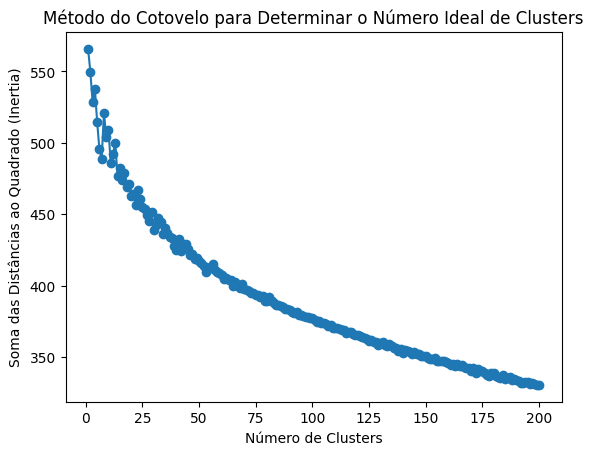

In [ ]:


# Função para rodar K-Means e calcular inertia
def calculate_inertia(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_embeddings_array)
    return k, kmeans.inertia_

# Método do Cotovelo para determinar o número ideal de clusters
k_range = range(1, 201,1)
sse = []
log = []

# Usar ThreadPoolExecutor para paralelismo
with ThreadPoolExecutor(max_workers=None) as executor:
    futures = {executor.submit(calculate_inertia, k): k for k in k_range}
    for future in as_completed(futures):
        k, inertia = future.result()
        sse.append(inertia)
        log.append(f'Calculando para k={k}')
        print(f'Calculando para k={k}')  # Print para acompanhar

# Plotar o gráfico da técnica do cotovelo
plt.plot(sorted(k_range), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias ao Quadrado (Inertia)')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()



In [ ]:
silhouette_scores = []
for n_clusters in range(2, 201):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(reduced_embeddings_array)
    silhouette_avg = silhouette_score(reduced_embeddings_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)


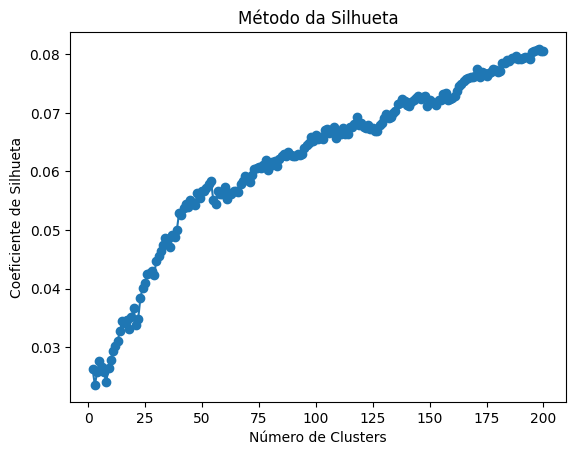

In [ ]:

plt.plot(range(2, 201), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=50, random_state=42)
unique_clusters = kmeans.fit_predict(reduced_embeddings_array)
unique_descriptions = df["Description"].unique()

unique_products_df = pd.DataFrame({
    "Product" : unique_descriptions,
    "Cluster" : unique_clusters
})

c:\Users\isacs\anaconda3\envs\stenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Criar um dicionário de mapeamento das descrições para os clusters
product_to_cluster = dict(zip(unique_products_df['Product'], unique_products_df['Cluster']))


In [17]:
# Mapear os clusters das descrições únicas para as descrições no DataFrame original
df['ProductCluster'] = df['Description'].map(product_to_cluster)


In [18]:
df_cluster_description = df[["Description","ProductCluster"]].drop_duplicates(subset="Description")

### Exploratory Analysis
### Análise Exploratória

In [ ]:
#Quantidade de produtos por cluster
df_cluster_description.groupby(by="ProductCluster").agg({"Description":"count"}).sort_values(by="Description").rename(columns={"Description":"Quantidade de Produtos"})

Quantidade de Produtos
ProductCluster                        
45                                  17
32                                  22
19                                  25
25                                  33
42                                  37
33                                  43
4                                   45
39                                  49
20                                  50
43                                  50
31                                  52
10                                  53
23                                  55
8                                   56
24                                  57
41                                  60
21                                  60
17                                  62
11                                  63
35                                  63
22                                  64
2                                   65
13                                  68
28                                  69
40                                  70
0                                   70
15                                  71
47                                  72
34                                  72
27                                  77
49                                  78
30                                  78
36                                  78
18                                  81
37                                  83
5                                   84
26                                  86
38                                 101
48                                 102
7                                  102
12                                 110
29                                 114
14                                 114
6                                  116
9                                  122
3                                  126
16                                 146
1                                  164
44                                 166
46                                 174

In [61]:
df.groupby("ProductCluster").agg({"UnitPrice":"mean"}).describe()

UnitPrice
count  50.000000
mean    3.015226
std     1.546401
min     0.586932
25%     1.862190
50%     2.586063
75%     4.081015
max     6.760732

In [62]:
# Agrupar pelo cluster e somar o total de vendas
vendas_por_cluster = df.groupby("ProductCluster").agg({"InvoiceTotal": "sum"}).reset_index()

# Ordenar os clusters pelo total de vendas em ordem decrescente
vendas_por_cluster = vendas_por_cluster.sort_values(by="InvoiceTotal", ascending=False)

vendas_por_cluster.sort_values(by="InvoiceTotal", ascending=False)

ProductCluster  InvoiceTotal
29              29    639130.100
16              16    550313.860
46              46    494095.760
30              30    409275.030
27              27    336783.310
48              48    315933.360
1                1    305578.020
3                3    288186.940
7                7    279821.590
9                9    274455.540
14              14    259935.460
20              20    253332.260
47              47    252867.170
40              40    236701.070
18              18    228345.410
37              37    215434.550
34              34    199654.110
43              43    197963.760
6                6    179544.201
38              38    177326.150
49              49    173559.280
2                2    158797.470
35              35    148100.820
23              23    147089.330
4                4    142640.310
44              44    119838.230
22              22    114458.860
24              24    106810.580
0                0    100653.550
11              11     99070.370
28              28     98303.640
33              33     68543.520
5                5     64809.670
39              39     63227.010
21              21     63021.270
42              42     62069.330
31              31     58391.110
36              36     52763.150
15              15     51507.370
10              10     45818.430
8                8     33402.540
41              41     26712.543
17              17     25680.120
45              45     19397.070
12              12     10194.990
13              13      9168.950
26              26      7835.480
25              25      2594.610
32              32      2253.580
19              19       414.470

In [63]:
vendas_por_cluster['InvoiceTotal'].describe()

count        50.000000
mean     163436.106080
std      146121.287184
min         414.470000
25%       54170.140000
50%      131239.270000
75%      248825.645000
max      639130.100000
Name: InvoiceTotal, dtype: float64

In [64]:
top_ten_cut = vendas_por_cluster['InvoiceTotal'].quantile(.9)

In [65]:
top_ten_cut

318018.35500000004

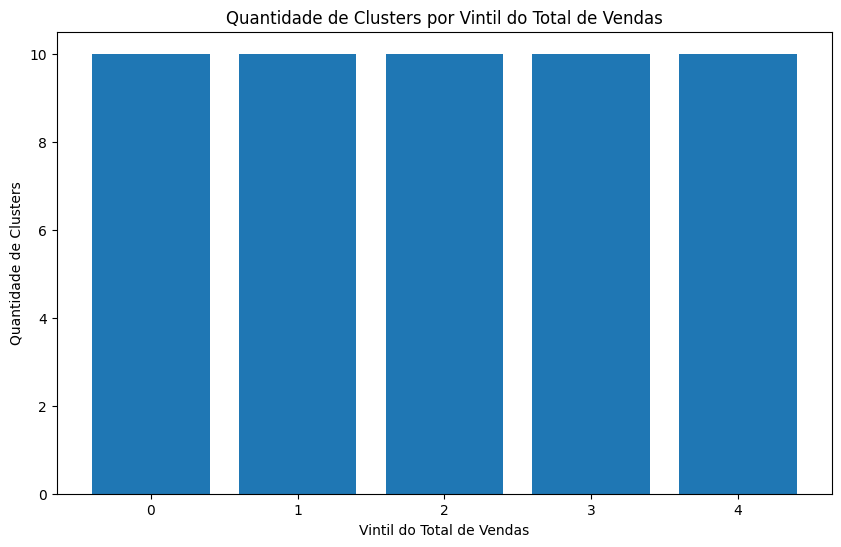

In [ ]:
# Calcular os vintis do total de vendas
vendas_por_cluster['Vintil'] = pd.qcut(vendas_por_cluster['InvoiceTotal'], 5, labels=False)

# Contar a quantidade de clusters em cada vintil
clusters_por_vintil = vendas_por_cluster.groupby('Vintil')['ProductCluster'].count().reset_index()

# Renomear as colunas para clareza
clusters_por_vintil.columns = ['Vintil', 'QuantidadeClusters']

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(clusters_por_vintil['Vintil'], clusters_por_vintil['QuantidadeClusters'])
plt.xlabel('Vintil do Total de Vendas')
plt.ylabel('Quantidade de Clusters')
plt.title('Quantidade de Clusters por Vintil do Total de Vendas')
plt.show()


In [67]:
vendas_por_cluster.head(20)

ProductCluster  InvoiceTotal  Vintil
29              29    639130.100       4
16              16    550313.860       4
46              46    494095.760       4
30              30    409275.030       4
27              27    336783.310       4
48              48    315933.360       4
1                1    305578.020       4
3                3    288186.940       4
7                7    279821.590       4
9                9    274455.540       4
14              14    259935.460       3
20              20    253332.260       3
47              47    252867.170       3
40              40    236701.070       3
18              18    228345.410       3
37              37    215434.550       3
34              34    199654.110       3
43              43    197963.760       3
6                6    179544.201       3
38              38    177326.150       3

## Informação sobre Feriados e data comemorativas

### Getting API data
### Pegando os dados da API

In [49]:
#Lista de Feriados por Pais
countries_list = df['Country'].unique().tolist()

In [ ]:
# Sua chave de API (substitua pela sua própria)
api_key = 'sua_chave_claendarific_aqui'


# Mapeamento de nomes de países para códigos ISO Alpha-2
country_codes = {
    'United Kingdom': 'GB', 'France': 'FR', 'Australia': 'AU', 'Netherlands': 'NL', 'Germany': 'DE',
    'Norway': 'NO', 'EIRE': 'IE', 'Switzerland': 'CH', 'Spain': 'ES', 'Poland': 'PL', 'Portugal': 'PT',
    'Italy': 'IT', 'Belgium': 'BE', 'Lithuania': 'LT', 'Japan': 'JP', 'Iceland': 'IS', 'Channel Islands': 'JE',
    'Denmark': 'DK', 'Cyprus': 'CY', 'Sweden': 'SE', 'Finland': 'FI', 'Austria': 'AT', 'Greece': 'GR',
    'Singapore': 'SG', 'Lebanon': 'LB', 'United Arab Emirates': 'AE', 'Israel': 'IL', 'Saudi Arabia': 'SA',
    'Czech Republic': 'CZ', 'Canada': 'CA', 'Brazil': 'BR', 'USA': 'US', 'Bahrain': 'BH', 'Malta': 'MT', 'RSA': 'ZA'
}

# Função para obter feriados de um país
def get_holidays(country_code):
    url = f"https://calendarific.com/api/v2/holidays?&api_key={api_key}&country={country_code}&year=2011"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'response' in data and 'holidays' in data['response']:
            holidays = data['response']['holidays']
            return holidays
        else:
            print(f"Erro na estrutura dos dados recebidos para {country_code}: {data}")
            return []
    else:
        print(f"Erro na solicitação para {country_code}: {response.status_code}")
        return []

# Obter feriados para cada país
holidays_dict = {}
for country, code in country_codes.items():
    holidays = get_holidays(code)
    holidays_dict[country] = holidays


Erro na estrutura dos dados recebidos para BH: {'meta': {'code': 200}, 'response': []}


#### Inserindo os Dados de Feriados no DataFrame

In [51]:
#The API CALENDARIFIC returns national, local, religious and observance type of holidays
#A API CELENDARIFIC retorna feriados nacionais, locais, religiosos e comemorações 
#Getting all national and religious holidays dates
holidays_dates = {}
for country in holidays_dict.keys():
    holidays_dates_list = []
    for holiday in holidays_dict[country]:
        if holiday["type"] != ["Local Holiday"]:
            holidays_dates_list.append(holiday["date"]["iso"])
    holidays_dates[country] = holidays_dates_list

In [52]:
# Função para verificar se a data é um feriado 
def is_holiday(row): 
    country = row['Country'] 
    invoice_date = row['InvoiceDate'].strftime('%Y-%m-%d') 
    if country in holidays_dates: 
        if invoice_date in holidays_dates[country]: 
            return 1 
        return 0 # Aplicar a função ao DataFrame 

df['Holiday'] = df.apply(is_holiday, axis=1)

In [53]:
#Porcentagem de vendas feitas em feriado e data comemorativas
total_of_days = df['InvoiceDate'].max() - df['InvoiceDate'].min()
total_of_days = total_of_days.days
total_of_days

373

In [54]:
#Media de venda por dia que não é feriado e nem data comemorativa

nonholiday_average_sales = df[df['Holiday'] == 0].groupby('InvoiceDate').agg({"InvoiceTotal":'sum'}).mean()
print(f"Média de vendas por dia que não são feriado: {nonholiday_average_sales['InvoiceTotal']}")
holidays_average_sales = df[df['Holiday'] == 1].groupby('InvoiceDate').agg({"InvoiceTotal":'sum'}).mean()
print(f"Média de vendas em feriados: {holidays_average_sales['InvoiceTotal']}") 


Média de vendas por dia que não são feriado: 482.97365416931444
Média de vendas em feriados: 435.38485405050835


In [55]:
holidays_weeks = {}
for country in holidays_dates.keys():
    list = holidays_dates[country]
    new_list = []
    for holiday in list:
        date = pd.to_datetime(holiday)
        start_date = date - pd.Timedelta(days=6)
        date_range = pd.date_range(start=start_date, periods=7)
        for d in date_range:
            new_list.append(d.strftime('%Y-%m-%d'))
    holidays_weeks[country] = new_list


In [56]:
# Função para verificar se a data é um feriado 
def is_holiday_week(row): 
    country = row['Country'] 
    invoice_date = row['InvoiceDate'].strftime('%Y-%m-%d') 
    if country in holidays_weeks: 
        if invoice_date in holidays_weeks[country]: 
            return 1 
        else: return 0 
# Aplicar a função ao DataFrame 

df['Holiday_week'] = df.apply(is_holiday_week, axis=1)

### Holidays Exploratory Analysis
### Analise Exploratória dos Feriados

#### Data Preparation

In [57]:
#Media de venda por dia que não é feriado e nem data comemorativa

nonholiday_week_average_sales = df[df['Holiday_week'] == 0].groupby('InvoiceDate').agg({"InvoiceTotal":'sum'}).mean()
print(f"Média de vendas por dia que não estão em semana de data comemorativas: {nonholiday_average_sales['InvoiceTotal']}")
holidays_week_average_sales = df[df['Holiday_week'] == 1].groupby('InvoiceDate').agg({"InvoiceTotal":'sum'}).mean()
print(f"Média de vendas em semana de datas comemorativas: {holidays_average_sales['InvoiceTotal']}") 


Média de vendas por dia que não estão em semana de data comemorativas: 482.97365416931444
Média de vendas em semana de datas comemorativas: 435.38485405050835


In [58]:
df['InvoiceDate_Day'] = df['InvoiceDate'].dt.date

In [59]:
# Agrupar por data e StockCode, somando os valores de InvoiceTotal por dia e produto
daily_sales = df[df['Holiday'] == 0].groupby(['InvoiceDate_Day', 'StockCode', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Agora agrupar por StockCode para calcular a média diária de vendas
average_sales_per_day_per_product = daily_sales.groupby(['StockCode','ProductCluster'])['InvoiceTotal'].mean().reset_index()

# Renomear a coluna para algo mais descritivo
average_sales_per_day_per_product = average_sales_per_day_per_product.rename(columns={"InvoiceTotal": "AverageDailySales"})

average_sales_per_day_per_product.sort_values(by="AverageDailySales", ascending=False)


StockCode  ProductCluster  AverageDailySales
1369     22502              34          39619.500
1690     22833              37            817.860
262      20914              38            734.400
3670       DOT              40            733.652
863      21897              36            625.410
...        ...             ...                ...
2593    47013A              38              0.580
3154     84990               9              0.550
2844     84227              22              0.420
2836    84201B              49              0.190
3672      PADS              41              0.001

[3674 rows x 3 columns]

In [60]:
average_sales_per_day_per_cluster = average_sales_per_day_per_product.groupby("ProductCluster").agg({"AverageDailySales": 'mean'})
average_sales_per_day_per_cluster.sort_values(by='AverageDailySales', ascending=False)

AverageDailySales
ProductCluster                   
34                     590.907737
39                      69.110709
37                      56.217219
20                      48.825003
7                       39.951892
40                      37.375437
16                      36.907435
30                      36.380316
2                       36.022051
27                      34.906803
48                      34.789208
47                      34.588046
29                      34.244848
0                       31.885117
38                      31.787832
3                       29.845550
46                      29.606453
33                      29.484962
4                       27.411021
18                      27.121073
43                      26.697377
23                      25.180126
42                      25.025774
1                       24.731140
36                      24.491981
14                      23.962371
24                      23.036946
35                      22.958296
22                      21.527888
8                       21.451790
9                       21.235096
28                      20.023122
6                       19.440966
17                      18.828468
11                      18.465087
12                      17.845179
5                       17.287269
31                      17.163719
49                      16.786224
44                      15.962573
21                      15.846662
41                      14.525468
25                      14.183877
26                      13.859431
45                      12.845031
10                      12.598438
15                      12.026654
13                      10.410496
32                      10.320350
19                       3.689557

In [61]:
# Agrupar por data e StockCode, somando os valores de InvoiceTotal por dia e produto
holidays_daily_sales = df[df['Holiday'] == 1].groupby(['InvoiceDate_Day', 'StockCode', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Agora agrupar por StockCode para calcular a média diária de vendas
holidays_average_sales_per_day_per_product = holidays_daily_sales.groupby(['StockCode','ProductCluster'])['InvoiceTotal'].mean().reset_index()

# Renomear a coluna para algo mais descritivo
holidays_average_sales_per_day_per_product = holidays_average_sales_per_day_per_product.rename(columns={"InvoiceTotal": "HolidaysAverageDailySales"})

holidays_average_sales_per_day_per_product.sort_values(by="HolidaysAverageDailySales", ascending=False)


StockCode  ProductCluster  HolidaysAverageDailySales
3226       DOT              40                 901.580000
2268     23553              30                 462.136364
2270     23555              30                 419.166667
2273     23558              30                 411.544444
2272     23557              30                 391.388889
...        ...             ...                        ...
2404    44089C               2                   0.420000
477      21393              35                   0.390000
2336    35818B              13                   0.380000
3216    90214I              19                   0.290000
3221    90214R              19                   0.290000

[3229 rows x 3 columns]

In [62]:
sales_comparison= holidays_average_sales_per_day_per_product.merge(average_sales_per_day_per_product, on='StockCode')
sales_comparison.drop(columns=['ProductCluster_y'], inplace=True)
sales_comparison.rename(columns={'ProductCluster_x':'ProductCluster'}, inplace=True)

In [63]:
sales_comparison['Difference'] = sales_comparison['HolidaysAverageDailySales'] - sales_comparison['AverageDailySales']

In [64]:
sales_comparison['DiffPercentagem'] = sales_comparison["Difference"]/(sales_comparison["AverageDailySales"]/100)

#### Analysis

##### Product Sales

In [65]:
sales_comparison.sort_values(by='DiffPercentagem',ascending=False)

StockCode  ProductCluster  HolidaysAverageDailySales  AverageDailySales  \
2449     40003               2                  91.200000           6.375000   
2324     23557              30                 391.388889          28.779167   
2669    84201B              49                   2.280000           0.190000   
567      21556              18                 156.916667          13.151471   
202      20854              35                  76.075000           7.742308   
...        ...             ...                        ...                ...   
3247    90214I              19                   0.290000           9.240000   
442      21348              18                   2.950000         117.566667   
3185     90149              12                   7.500000         327.780000   
782      21898              36                   2.950000         236.680000   
1281     22502              30                  49.117391       39619.500000   

        Difference  DiffPercentagem  
2449     84.825000      1330.588235  
2324    362.609722      1259.972974  
2669      2.090000      1100.000000  
567     143.765196      1093.149204  
202      68.332692       882.588177  
...            ...              ...  
3247     -8.950000       -96.861472  
442    -114.616667       -97.490785  
3185   -320.280000       -97.711880  
782    -233.730000       -98.753591  
1281 -39570.382609       -99.876027  

[3260 rows x 6 columns]

In [66]:
sales_comparison[['HolidaysAverageDailySales','AverageDailySales','Difference','DiffPercentagem']].describe()

HolidaysAverageDailySales  AverageDailySales    Difference  \
count                3260.000000        3260.000000   3260.000000   
mean                   22.998891          39.430690    -16.431799   
std                    34.205322         694.481551    693.660760   
min                     0.290000           0.190000 -39570.382609   
25%                     8.400000          10.336822     -8.166378   
50%                    14.492000          17.686565     -2.558822   
75%                    26.104423          30.725947      1.160755   
max                   901.580000       39619.500000    406.833983   

       DiffPercentagem  
count      3260.000000  
mean         -3.649623  
std          82.261300  
min         -99.876027  
25%         -39.044620  
50%         -17.715528  
75%           9.185837  
max        1330.588235

In [67]:
sales_comparison[sales_comparison['DiffPercentagem'] >=10]

StockCode  ProductCluster  HolidaysAverageDailySales  AverageDailySales  \
2        10120              46                   1.890000           1.638000   
3       10124A              15                   1.680000           1.260000   
10       15034              15                  10.290000           6.176610   
14      15044B               2                  23.016667          19.367647   
20      15058A              35                  33.775000          25.770000   
...        ...             ...                        ...                ...   
3239    90210B              26                  13.850000           7.725000   
3248    90214K              19                   3.770000           3.098000   
3251    90214P              19                   3.770000           1.807500   
3254    90214Y              19                  13.920000           2.365000   
3257       DOT              40                 901.580000         733.652000   

      Difference  DiffPercentagem  
2        0.25200        15.384615  
3        0.42000        33.333333  
10       4.11339        66.596235  
14       3.64902        18.840800  
20       8.00500        31.063252  
...          ...              ...  
3239     6.12500        79.288026  
3248     0.67200        21.691414  
3251     1.96250       108.575380  
3254    11.55500       488.583510  
3257   167.92800        22.889326  

[802 rows x 6 columns]

In [68]:
holidays_sold_products = df[df['Holiday']== 1]['StockCode'].unique()
nonholidays_sold_products = df[df['Holiday']== 0]['StockCode'].unique()

In [69]:
exclusive_holiday_products = []
for product in holidays_sold_products:
    if product not in nonholidays_sold_products:
        exclusive_holiday_products.append(product)

In [70]:
len(exclusive_holiday_products)

28

Na média se vende menos em datas comemorativas e feriados. Entretanto há produtos que vendem mais nos feriados, são 802 produtos que vendem 10% a mais,540 produtos que vendem 25% a mais, 321 50% a mais e 163 que vendem o dobro em feriado e dadas comemorativas. E 28 produtos só vendem em feriado e data comemorativas.    


In [71]:
#soma das vendas de cada produto dentro do grupo
cluster_sales_comparison = sales_comparison.groupby('ProductCluster').agg({
                                                "HolidaysAverageDailySales":"sum",
                                                "AverageDailySales":"sum",
                                                })

In [72]:
#Calcula a diferença e a diferença percentual
cluster_sales_comparison['Difference'] = cluster_sales_comparison['HolidaysAverageDailySales'] - cluster_sales_comparison['AverageDailySales']
cluster_sales_comparison['DiffPercentage'] = cluster_sales_comparison["Difference"]/(cluster_sales_comparison["AverageDailySales"]/100)

In [73]:
cluster_sales_comparison[cluster_sales_comparison["DiffPercentage"] >= 10].sort_values(by="DiffPercentage", ascending=False)

HolidaysAverageDailySales  AverageDailySales  Difference  \
ProductCluster                                                             
8                             1163.479311        1035.935555  127.543756   
4                             1336.215482        1194.587005  141.628477   

                DiffPercentage  
ProductCluster                  
8                    12.311939  
4                    11.855853

Espelhos e relógios vedem até 10% a mais em datas comemorativas e feriados mesmo a média de venda sendo menor nessas datas.


##### Products Clusters Analysis

In [74]:
#média das vendas dos produto dentro dos grupos
cluster_sales_comparison_mean = sales_comparison.groupby('ProductCluster').agg({
                                                "HolidaysAverageDailySales":"mean",
                                                "AverageDailySales":"mean",
                                                })

In [75]:
#Calcula a diferença e a diferença percentual
cluster_sales_comparison_mean['Difference'] = cluster_sales_comparison_mean['HolidaysAverageDailySales'] - cluster_sales_comparison_mean['AverageDailySales']
cluster_sales_comparison_mean['DiffPercentage'] = cluster_sales_comparison_mean["Difference"]/(cluster_sales_comparison_mean["AverageDailySales"]/100)

In [76]:
cluster_sales_comparison_mean[cluster_sales_comparison_mean["DiffPercentage"] >= 10].sort_values(by="DiffPercentage", ascending=False)

HolidaysAverageDailySales  AverageDailySales  Difference  \
ProductCluster                                                             
8                               25.855096          23.020790    2.834306   
4                               33.405387          29.864675    3.540712   

                DiffPercentage  
ProductCluster                  
8                    12.311939  
4                    11.855853

Há 2 grupos de produtos que vendem 10% a mais em feriados considerando a média de venda diarias  

### Holidays Weeks Analysis

#### Data Preparation

In [77]:
# Agrupar por data e StockCode, somando os valores de InvoiceTotal por dia e produto
holidays_week_daily_sales = df[df['Holiday_week'] == 1].groupby(['InvoiceDate_Day', 'StockCode', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Agora agrupar por StockCode para calcular a média diária de vendas
holidays_week_average_sales_per_day_per_product = holidays_week_daily_sales.groupby(['StockCode','ProductCluster'])['InvoiceTotal'].mean().reset_index()

# Renomear a coluna para algo mais descritivo
holidays_week_average_sales_per_day_per_product = holidays_week_average_sales_per_day_per_product.rename(columns={"InvoiceTotal": "HolidaysWeekAverageDailySales"})

holidays_week_average_sales_per_day_per_product.sort_values(by="HolidaysWeekAverageDailySales", ascending=False)


StockCode  ProductCluster  HolidaysWeekAverageDailySales
1341     22502              34                   39619.500000
3578       DOT              40                     857.566667
841      21897              36                     625.410000
1266     22423              27                     375.676407
1610     22783              48                     334.301250
...        ...             ...                            ...
2543    47013A              38                       0.760000
3082     84990               9                       0.550000
101      17174               6                       0.420000
2785     84227              22                       0.420000
3580      PADS              41                       0.001000

[3582 rows x 3 columns]

In [78]:
sales_comparison_holiday_week = holidays_week_average_sales_per_day_per_product.merge(average_sales_per_day_per_product, on='StockCode')
sales_comparison_holiday_week.drop(columns=['ProductCluster_y'], inplace=True)
sales_comparison_holiday_week.rename(columns={'ProductCluster_x':'ProductCluster'}, inplace=True)

In [79]:
sales_comparison_holiday_week['Difference'] = sales_comparison_holiday_week['HolidaysWeekAverageDailySales'] - sales_comparison_holiday_week['AverageDailySales']

In [80]:
sales_comparison_holiday_week['DiffPercentagem'] = sales_comparison_holiday_week["Difference"]/(sales_comparison_holiday_week["AverageDailySales"]/100)

#### Analysis

In [81]:
sales_comparison_holiday_week.sort_values(by='Difference',ascending=False).head(10)

StockCode  ProductCluster  HolidaysWeekAverageDailySales  \
1352     22502              34                   39619.500000   
2421     23557              30                     201.597368   
2417     23553              30                     214.994643   
2419     23555              30                     200.789130   
2420     23556              30                     188.982000   
2422     23558              30                     178.168000   
3617       DOT              40                     857.566667   
2418     23554              30                     160.108621   
3493     90154              12                     192.975000   
2350     23485               4                     185.600000   

      AverageDailySales    Difference  DiffPercentagem  
1352          72.518132  39546.981868     54533.922551  
2421          28.779167    172.818202       600.497588  
2417          55.302381    159.692262       288.762001  
2419          56.361765    144.427366       256.250610  
2420          53.060526    135.921474       256.163071  
2422          45.015000    133.153000       295.796957  
3617         733.652000    123.914667        16.890115  
2418          44.130952    115.977668       262.803457  
3493          84.350000    108.625000       128.778897  
2350          92.339130     93.260870       100.998211

Picnic Baskets sell more than 500 times more on holiday weeks than on days away from commemorative dates.

Cestas de Piquenique vendem  mais de 500 vezes a mais em semana de feriado do que em dias longe de datas comemorativas.

In [82]:
sales_comparison_holiday_week[['HolidaysWeekAverageDailySales','AverageDailySales','Difference','DiffPercentagem']].describe()

HolidaysWeekAverageDailySales  AverageDailySales    Difference  \
count                    3621.000000        3621.000000   3621.000000   
mean                       45.875287          48.222935     -2.347648   
std                       931.035803         931.207347    929.911521   
min                         0.001000           0.001000 -39554.248125   
25%                         9.013333           9.705294     -3.251572   
50%                        15.281528          16.760000     -0.625000   
75%                        27.192047          29.341562      0.604583   
max                     39619.500000       39619.500000  39546.981868   

       DiffPercentagem  
count      3621.000000  
mean         12.398414  
std         907.103739  
min         -99.835304  
25%         -16.247591  
50%          -4.545455  
75%           4.434097  
max       54533.922551

On average, 12.5% less is usually sold in days before holidays and commemorative dates.

Na média se costuma vender 12,5% a menos em dias antecedentes a feriados e datas comemorativas

In [83]:
sales_comparison_holiday_week[sales_comparison_holiday_week['DiffPercentagem'] >=200]

StockCode  ProductCluster  HolidaysWeekAverageDailySales  \
234      20854              35                      33.070000   
236      20857              44                      15.675000   
549      21421              44                      33.765556   
550      21422              44                      34.118125   
620      21556              18                      61.476923   
1077     22199              29                      13.765000   
1352     22502              34                   39619.500000   
1793     22950               3                      82.013333   
1911     23071              18                      46.636364   
2176     23306              48                      34.409710   
2417     23553              30                     214.994643   
2418     23554              30                     160.108621   
2419     23555              30                     200.789130   
2420     23556              30                     188.982000   
2421     23557              30                     201.597368   
2422     23558              30                     178.168000   
2832    84201B              49                       1.235000   
2879     84499              17                       5.100000   
2897     84527              44                      20.137500   
3439     90093              26                       4.885000   
3526    90177B              25                      17.700000   

      AverageDailySales    Difference  DiffPercentagem  
234            7.742308     25.327692       327.133631  
236            4.007143     11.667857       291.176471  
549            9.305556     24.460000       262.853731  
550           10.380000     23.738125       228.690992  
620           13.151471     48.325452       367.452842  
1077           4.250000      9.515000       223.882353  
1352          72.518132  39546.981868     54533.922551  
1793          13.775000     68.238333       495.378100  
1911          12.500000     34.136364       273.090909  
2176           5.480000     28.929710       527.914419  
2417          55.302381    159.692262       288.762001  
2418          44.130952    115.977668       262.803457  
2419          56.361765    144.427366       256.250610  
2420          53.060526    135.921474       256.163071  
2421          28.779167    172.818202       600.497588  
2422          45.015000    133.153000       295.796957  
2832           0.190000      1.045000       550.000000  
2879           0.850000      4.250000       500.000000  
2897           5.362500     14.775000       275.524476  
3439           1.370000      3.515000       256.569343  
3526           2.950000     14.750000       500.000000

There are 127 products that sell more than 50% more in the week preceding holidays and commemorative dates. There are 657 that sell more than twice as much and 21 that sell 3 times as much.

Existe 127 produtos que vendem mais do que 50% a mais em na semana antecedente a feriados e datas comemorativas. São 657 que vendem mais do que o dobro e 21 que vendem 3 vezes mais.

In [84]:
holidays_week_sold_products = df[df['Holiday_week']== 1]['StockCode'].unique()
nonholidays_sold_products = df[df['Holiday_week']== 0]['StockCode'].unique()
exclusive_week_holiday_products = []
for product in holidays_week_sold_products:
    if product not in nonholidays_sold_products:
        exclusive_week_holiday_products.append(product)

len(exclusive_week_holiday_products)


232

There are 232 products that are only sold in the week before a holiday or commemorative date.

São 232 produtos que só são vendidos na semana que antecede uma feriado ou data comemorativa.

In [85]:
#soma das vendas de cada produto dentro do grupo
cluster_holiday_week_sales_comparison = sales_comparison_holiday_week.groupby('ProductCluster').agg({
                                                "HolidaysWeekAverageDailySales":"sum",
                                                "AverageDailySales":"sum",
                                                })

In [86]:
#Calcula a diferença e a diferença percentual
cluster_holiday_week_sales_comparison['Difference'] = cluster_holiday_week_sales_comparison['HolidaysWeekAverageDailySales'] - cluster_holiday_week_sales_comparison['AverageDailySales']
cluster_holiday_week_sales_comparison['DiffPercentage'] = cluster_holiday_week_sales_comparison["Difference"]/(cluster_holiday_week_sales_comparison["AverageDailySales"]/100)

In [87]:
cluster_holiday_week_sales_comparison[cluster_holiday_week_sales_comparison["DiffPercentage"] >= 5].sort_values(by="DiffPercentage", ascending=False)

HolidaysWeekAverageDailySales  AverageDailySales  \
ProductCluster                                                     
34                               80780.453645       41459.588289   
4                                 1290.004365        1203.614941   
8                                 1157.823251        1096.268055   

                  Difference  DiffPercentage  
ProductCluster                                
34              39320.865356       94.841427  
4                  86.389424        7.177497  
8                  61.555196        5.614977

There are 3 groups of products that sell the most in the week before commemorative days and holidays. Jars  were sold in double.

São 3 grupos de produtos que vendem mais na semana que antecede os dias comemorativos e feriados. Jarras e potes foram vendidos em dobro.

### Temporal Analysis
### Análise Temporal

Is there any time of the year, month, or day of the week when a certain group of products is sold more or more?

Há alguma época do ano, mês, ou dia da semana que se vende mais ou que se vende mais algum determinado grupo de produtos?

In [88]:
df['InvoiceDate_Day'] = pd.to_datetime(df['InvoiceDate_Day'])

In [89]:
df['Month'] = df['InvoiceDate_Day'].dt.month
df['WeekOfMonth'] = df['InvoiceDate_Day'].apply(lambda d: (d.day-1) // 7 + 1)
df['DayOfMonth'] = df['InvoiceDate_Day'].dt.day
df['DayOfWeek'] = df['InvoiceDate_Day'].dt.dayofweek  # 0 = Segunda-feira, 6 = Domingo


In [90]:
df[df["DayOfWeek"] == 5]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, InvoiceTotal, Embedding, ReducedEmbedding, ProductCluster, Holiday, Holiday_week, InvoiceDate_Day, Month, WeekOfMonth, DayOfMonth, DayOfWeek]
Index: []

In [91]:
# Agrupar por Mês
vendas_por_mes = df.groupby('Month')['InvoiceTotal'].sum()
print("Vendas por Mês:\n", vendas_por_mes)

# Agrupar por Semana do Mês
vendas_por_semana_do_mes = df.groupby('WeekOfMonth')['InvoiceTotal'].sum()
print("Vendas por Semana do Mês:\n", vendas_por_semana_do_mes)

# Agrupar por Dia do Mês
vendas_por_dia_do_mes = df.groupby('DayOfMonth')['InvoiceTotal'].sum()
print("Vendas por Dia do Mês:\n", vendas_por_dia_do_mes)

# Agrupar por Dia da Semana
vendas_por_dia_da_semana = df.groupby('DayOfWeek')['InvoiceTotal'].sum()
print("Vendas por Dia da Semana:\n", vendas_por_dia_da_semana)


Vendas por Mês:
 Month
1      446734.270
2      423671.600
3      569922.920
4      429975.551
5      649427.810
6      631384.140
7      584330.941
8      616322.400
9      867050.062
10     986601.570
11    1117335.970
12     849048.070
Name: InvoiceTotal, dtype: float64
Vendas por Semana do Mês:
 WeekOfMonth
1    2090963.750
2    1972095.160
3    1994147.951
4    1627195.423
5     487403.020
Name: InvoiceTotal, dtype: float64
Vendas por Dia do Mês:
 DayOfMonth
1     279531.210
2     244270.830
3     269850.550
4     312599.550
5     338144.410
6     323872.990
7     322694.210
8     283848.360
9     278837.400
10    320774.280
11    295935.890
12    217149.290
13    243488.630
14    332061.310
15    281958.011
16    268093.520
17    311363.770
18    261016.990
19    245000.680
20    305969.710
21    320745.270
22    240197.790
23    246447.220
24    250005.640
25    223804.911
26    172526.612
27    210215.430
28    283997.820
29    160234.730
30    179966.990
31    147201.300
Name:

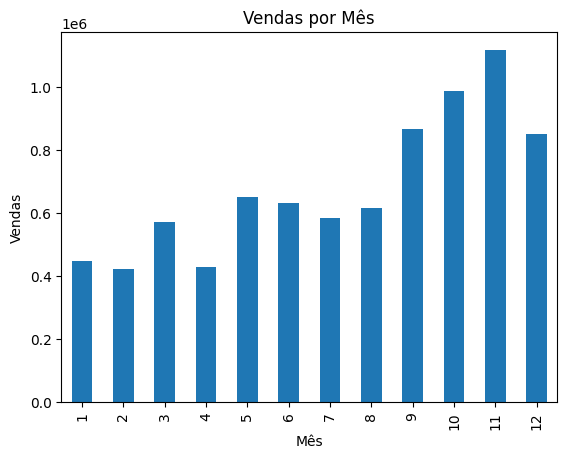

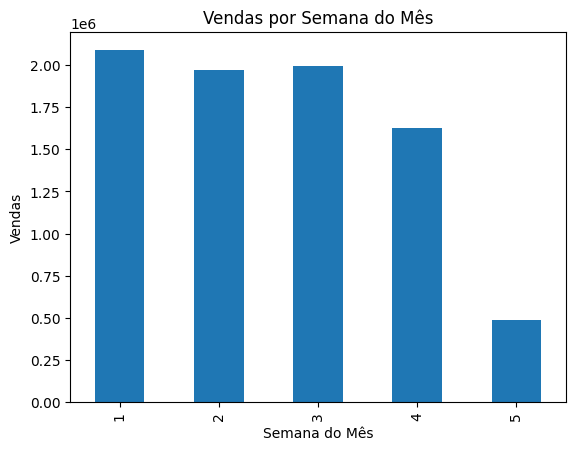

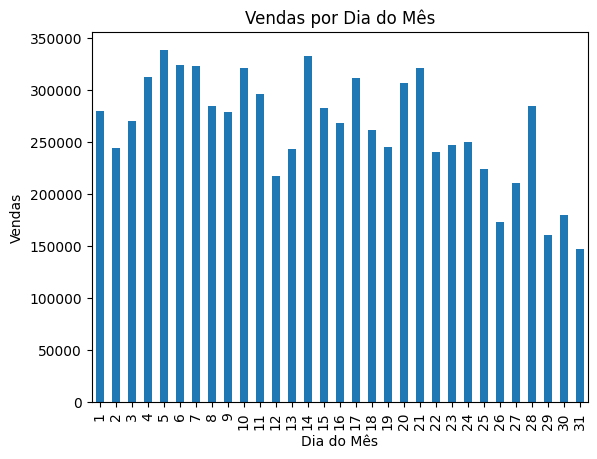

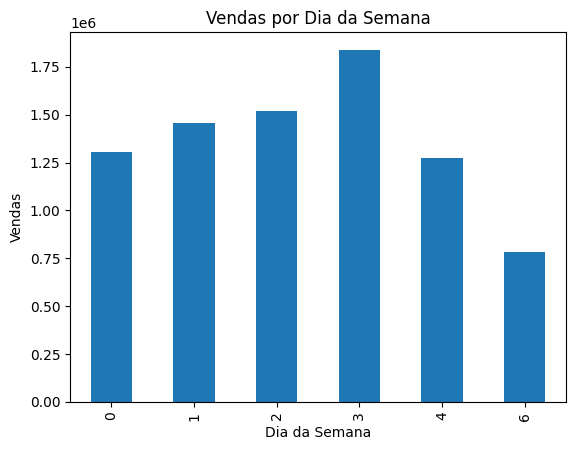

In [ ]:
# Vendas por Mês
vendas_por_mes.plot(kind='bar')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()

# Vendas por Semana do Mês
vendas_por_semana_do_mes.plot(kind='bar')
plt.title('Vendas por Semana do Mês')
plt.xlabel('Semana do Mês')
plt.ylabel('Vendas')
plt.show()

# Vendas por Dia do Mês
vendas_por_dia_do_mes.plot(kind='bar')
plt.title('Vendas por Dia do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Vendas')
plt.show()

# Vendas por Dia da Semana
vendas_por_dia_da_semana.plot(kind='bar')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas')
plt.show()


In [92]:
vendas_por_mes_cluster = df.groupby(['Month', 'ProductCluster'])['InvoiceTotal'].sum().unstack()
vendas_por_mes_cluster


ProductCluster        0         1         2         3         4         5   \
Month                                                                        
1                6915.47  16040.37   7361.66    370.45   4871.81   9899.09   
2                6787.24  13485.14   6543.66    237.11   6105.75  10901.14   
3                8041.23  17769.78   6944.28    560.85   6950.35  12466.16   
4                6844.94  12237.49   4146.78    505.97   8822.19   5014.65   
5                9884.59  19557.81  12869.14   1813.49   5695.32   1199.34   
6                7390.86  17707.79  10236.05   3063.94   8807.98   2195.69   
7                6349.04  19921.43   7345.58  10302.67  10483.68   2394.57   
8                6082.92  23433.01   8675.55  13922.47  18734.42   2387.31   
9               10123.82  37103.76  16574.12  57729.45  17019.75   1941.94   
10              10484.61  41209.60  21943.88  70395.29  23839.40   4330.93   
11              11069.27  50427.90  30489.32  89215.13  17418.92   4518.03   
12              10679.56  36683.94  25667.45  40070.12  13890.74   7560.82   

ProductCluster         6         7        8         9   ...        40  \
Month                                                   ...             
1               10179.300  16170.53  1002.58  12879.34  ...  11842.70   
2                7724.400  13735.31  1295.80  15400.45  ...   9722.83   
3               12930.170  21819.15  2165.54  20558.31  ...  14938.37   
4                7159.700  11370.48  1577.25  13666.89  ...  14480.32   
5               13153.580  19578.12  3039.89  15855.63  ...  29822.53   
6               14407.090  18433.25  1901.73  17589.82  ...  18520.18   
7               12648.970  17837.92  2227.81  23292.09  ...  16900.70   
8               12719.230  20237.03  2838.11  22459.75  ...  20959.47   
9               20809.681  30582.85  4149.09  34634.54  ...  20915.80   
10              19893.210  34135.28  4694.53  37384.07  ...  26585.46   
11              26662.790  43407.61  4231.83  38882.62  ...  34101.94   
12              21256.080  32514.06  4278.38  21852.03  ...  17910.77   

ProductCluster        41        42        43        44       45        46  \
Month                                                                       
1               1170.450   3232.52   8556.38   7979.35   894.46  22609.25   
2               1176.900   2266.45  10390.83   8289.83  1752.74  23084.33   
3               1784.390   2756.13  17472.31   9726.65  1525.80  41858.36   
4               1525.401   1727.33  14760.59  12167.41  2024.80  37061.19   
5               1378.710   1744.50  17921.00  12266.17  1326.30  44298.45   
6               2060.840   2018.93  12033.12   7799.83  1523.96  49007.50   
7                928.311   2000.10  13962.92   8567.67  2032.44  36795.65   
8                846.460   4975.76  11292.05   7188.32  2563.26  31143.29   
9               4685.211   8242.60  30195.82   8606.23   968.12  55265.46   
10              4580.160  15604.53  17318.87   9654.77  1775.14  67884.47   
11              4334.370  10259.07  23320.84  15672.29  1468.00  50268.92   
12              2241.340   7241.41  20739.03  11919.71  1542.05  34818.89   

ProductCluster        47        48        49  
Month                                         
1               14180.22  20530.16   7958.53  
2               12179.73  17114.21  10988.49  
3               14499.33  21263.88  13405.49  
4               15076.27  12378.53  14401.65  
5               27308.12  17303.27  24353.29  
6               16523.33  35317.40  16099.93  
7               17993.04  32413.36  16709.37  
8               16978.41  31683.09  13529.82  
9               22180.99  31849.60  14156.83  
10              25165.12  34776.16  14499.79  
11              38542.56  36427.00  17117.24  
12              32240.05  24876.70  10338.85  

[12 rows x 50 columns]

In [93]:
vendas_por_semana_cluster = df.groupby(['WeekOfMonth', 'ProductCluster'])['InvoiceTotal'].sum().unstack()
vendas_por_semana_cluster


ProductCluster        0         1         2         3         4         5   \
WeekOfMonth                                                                  
1               25485.88  82824.74  40315.30  74192.83  40497.15  15129.06   
2               24528.96  73685.73  40323.87  64317.72  26292.28  15584.41   
3               25595.94  67424.79  42217.69  63187.88  34279.96  16016.49   
4               19727.57  61272.08  27951.75  61804.35  31420.11  14086.88   
5                5315.20  20370.68   7988.86  24684.16  10150.81   3992.83   

ProductCluster         6         7        8         9   ...        40  \
WeekOfMonth                                             ...             
1               45754.840  74958.71  9365.72  62193.15  ...  60753.31   
2               42410.870  66334.34  7363.91  64036.36  ...  53447.54   
3               41570.280  64270.23  6982.62  67751.86  ...  55523.77   
4               37298.561  59859.94  8033.81  61535.76  ...  53722.01   
5               12509.650  14398.37  1656.48  18938.41  ...  13254.44   

ProductCluster        41        42        43        44       45         46  \
WeekOfMonth                                                                  
1               6895.400  18216.89  51558.12  30934.04  4627.28  125535.23   
2               6067.150  12055.24  50202.84  27788.72  5031.73  124389.58   
3               7307.961  16175.30  49231.43  30175.32  5078.98  130269.68   
4               4691.342  12020.99  33771.75  25214.34  3597.97   89059.38   
5               1750.690   3600.91  13199.62   5725.81  1061.11   24841.89   

ProductCluster        47        48        49  
WeekOfMonth                                   
1               67425.10  73193.80  44337.75  
2               61295.97  76048.20  39660.21  
3               57436.88  84090.09  44876.40  
4               51934.07  61700.48  34717.93  
5               14775.15  20900.79   9966.99  

[5 rows x 50 columns]

In [94]:
vendas_por_dia_cluster = df.groupby(['DayOfMonth', 'ProductCluster'])['InvoiceTotal'].sum().unstack()
vendas_por_dia_cluster


ProductCluster       0         1        2         3        4        5   \
DayOfMonth                                                               
1               3599.77  13489.06  6211.12  10275.80  4654.10  2879.98   
2               3045.24   9626.49  7271.20  11512.00  4153.08  1287.92   
3               3490.00  10032.31  4224.53   7303.35  6419.65  1851.10   
4               3650.08  14281.12  4360.16  10351.57  7218.51  1900.48   
5               3949.76  10592.21  4859.96  11818.12  8362.46  2521.91   
6               3388.71  11947.94  6674.99  13102.69  5234.77  2016.17   
7               4362.32  12855.61  6713.34   9829.30  4454.58  2671.50   
8               3364.30  12072.97  4964.16   9084.81  4076.09  2138.31   
9               5230.64  10596.79  5258.17   9658.49  4325.10  2576.70   
10              3018.53   9537.05  8373.49  11015.17  3493.33  2371.43   
11              3717.10  12028.85  7511.43   9607.29  4115.01  1938.08   
12              3003.99   9274.53  4342.61   6316.97  2798.66  1316.50   
13              2456.22   9579.57  3639.75   8766.58  2383.38  1390.24   
14              3738.18  10595.97  6234.26   9868.41  5100.71  3853.15   
15              2599.32   9420.90  6001.42   9908.03  3121.21  2191.63   
16              2902.00   9351.63  6921.40   9105.71  3604.27  2579.96   
17              5613.50   8948.75  6742.91   9460.10  5311.65  2397.09   
18              2321.29   9954.12  6297.80   9605.15  4144.11  1426.93   
19              4830.94   7827.46  5379.56   4914.69  4220.27  1816.26   
20              2674.44  10243.88  6035.55  10546.07  5585.50  2224.75   
21              4654.45  11678.05  4839.05   9648.13  8292.95  3379.87   
22              2574.45   9607.81  3533.11   9385.97  6095.14  2251.53   
23              2196.31   9148.21  4629.39  10726.53  2673.85  2168.19   
24              3527.82   9046.27  3786.20   7528.01  3473.94  2400.42   
25              2809.61   9088.25  3676.28   8276.96  6145.52  1656.46   
26              1644.40   7656.51  4015.32   5791.64  2790.41   963.31   
27              3325.14   7030.82  3818.43   8753.26  4112.36  1936.53   
28              3649.84   9694.21  4493.02  11341.98  6128.89  2710.44   
29              1884.25   5820.50  3538.30   8011.11  2892.52  1468.08   
30              1545.99   7619.80  2197.26  11198.48  4358.01  1267.63   
31              1884.96   6930.38  2253.30   5474.57  2900.28  1257.12   

ProductCluster        6         7        8         9   ...        40  \
DayOfMonth                                             ...             
1               7052.640   8999.04  1111.59   7330.24  ...   6297.64   
2               5430.260   9582.22   833.52   6961.24  ...   5232.67   
3               5989.700   9557.87  1261.33   8765.23  ...  13651.78   
4               5447.260  12010.71  1632.48   7942.15  ...   9433.64   
5               6710.260  12043.65   756.03  11700.30  ...  10224.46   
6               8092.910  10381.14  2410.62  10407.57  ...   8649.72   
7               7031.810  12384.08  1360.15   9086.42  ...   7263.40   
8               5881.830   9047.96  1847.39   8701.86  ...   6859.15   
9               5105.470   8446.85   895.51   8744.91  ...   7028.33   
10              6367.970   9263.15   824.99   9239.74  ...   8267.46   
11              7490.390   9441.96  1718.15   9573.60  ...   7099.39   
12              4592.430   6795.44   746.05   8429.46  ...   7236.15   
13              6130.470   8761.47   454.59   9482.28  ...   7696.16   
14              6842.310  14577.51   877.23   9864.51  ...   9260.90   
15              5440.020   8637.52  1297.08  10132.36  ...   7476.20   
16              5158.030  10041.07  1093.38   7512.69  ...   5922.86   
17              6303.140  10231.92   934.21  11338.98  ...  11025.47   
18              5524.310   9309.79   703.14   8748.21  ...   6610.84   
19              6830.230   6770.42   611.67   8429.67  ...   6582.12   
20              6122.040   9267.26  1286.83  

In [95]:
vendas_por_dia_semana_cluster = df.groupby(['DayOfWeek', 'ProductCluster'])['InvoiceTotal'].sum().unstack()
vendas_por_dia_semana_cluster


ProductCluster        0         1         2         3         4         5   \
DayOfWeek                                                                    
0               14988.85  48336.61  25876.17  50087.27  26082.14   9793.75   
1               20689.59  54239.90  25836.11  52182.70  28326.96  12258.98   
2               17318.92  49625.68  29027.35  51185.86  25642.93  12796.85   
3               23264.33  74196.69  36849.63  60668.05  30260.17  12372.89   
4               15092.13  41227.16  25557.02  41861.34  20203.51  11549.58   
6                9299.73  37951.98  15651.19  32201.72  12124.60   6037.62   

ProductCluster         6         7        8         9   ...        40  \
DayOfWeek                                               ...             
0               28034.601  41993.08  6384.71  44756.08  ...  40025.18   
1               33055.840  55011.88  6128.39  48658.85  ...  44383.86   
2               31731.540  50529.69  5761.39  52830.27  ...  44787.48   
3               42957.420  64241.73  6151.22  59155.72  ...  53633.65   
4               27206.510  40274.69  4649.12  43010.89  ...  33758.58   
6               16558.290  27770.52  4327.71  26043.73  ...  20112.32   

ProductCluster        41        42        43        44       45         46  \
DayOfWeek                                                                    
0               3888.220  10887.95  39711.87  18460.77  3857.25   97558.85   
1               4479.761   8627.54  35216.22  20824.02  4154.95   77491.43   
2               4267.500  11926.55  35275.45  24621.14  3537.12   83504.12   
3               6604.630  16755.63  40812.50  27375.49  3277.06  129448.89   
4               4275.291   8164.24  30471.62  16037.28  3113.49   68255.26   
6               3197.141   5707.42  16476.10  12519.53  1457.20   37837.21   

ProductCluster        47        48        49  
DayOfWeek                                     
0               42766.56  45632.93  29362.25  
1               46653.98  58166.49  30882.76  
2               48682.25  64673.62  33247.17  
3               53908.86  72928.87  38826.72  
4               35768.77  45156.93  23532.39  
6               25086.75  29374.52  17707.99  

[6 rows x 50 columns]

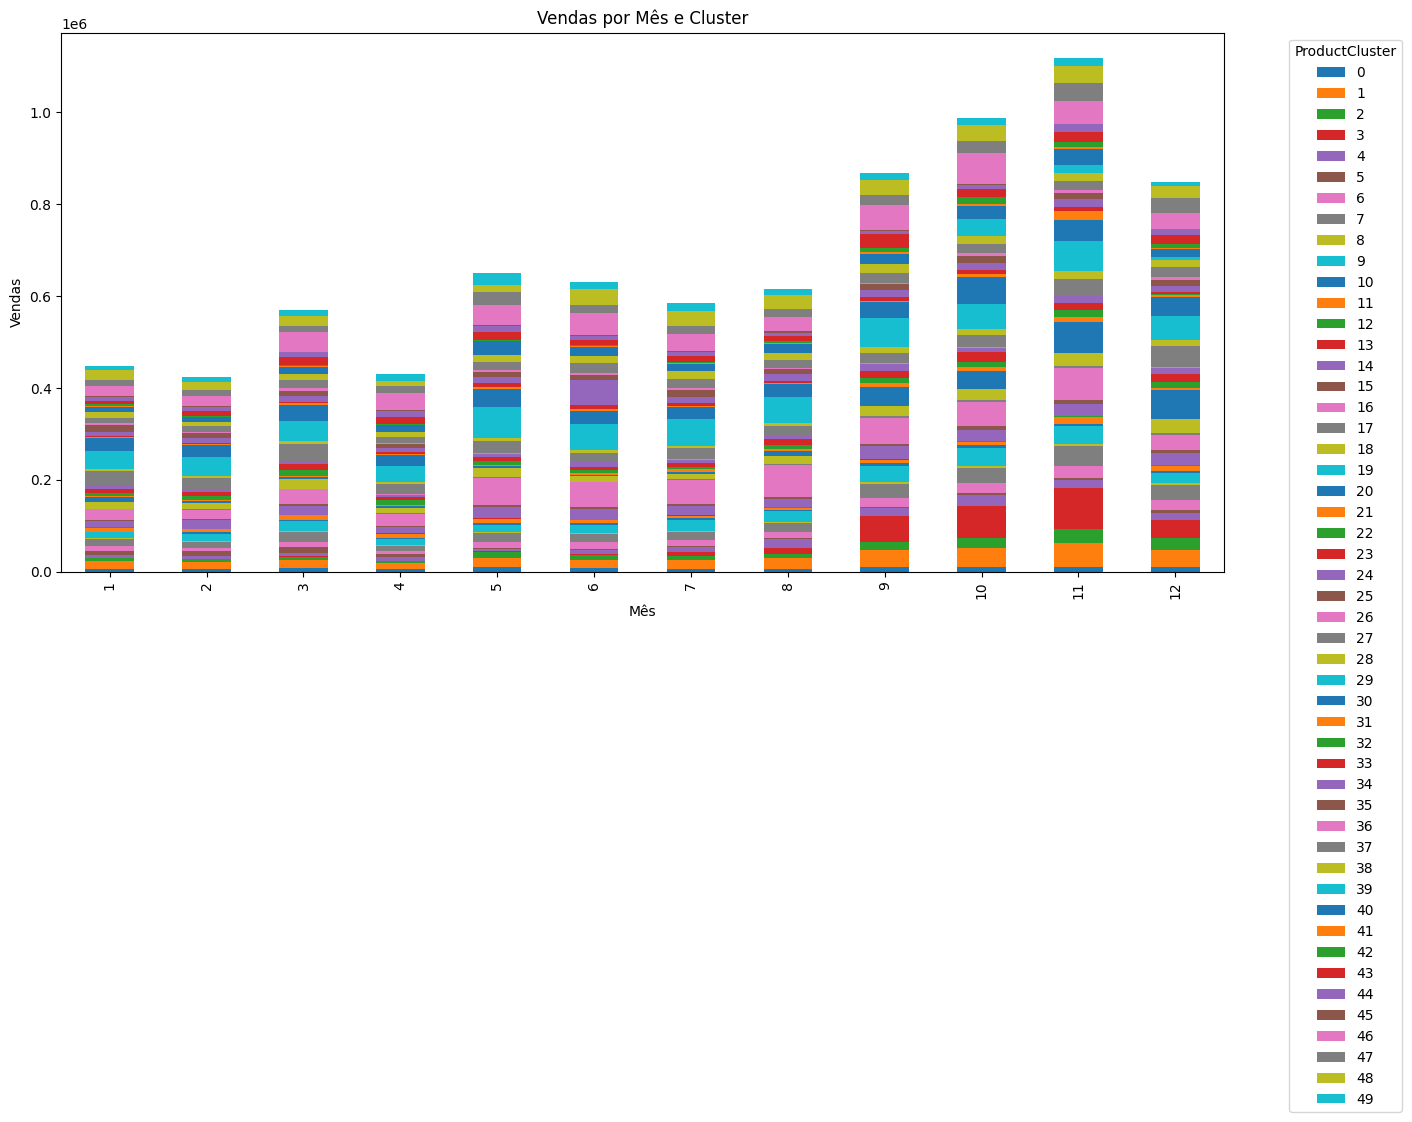

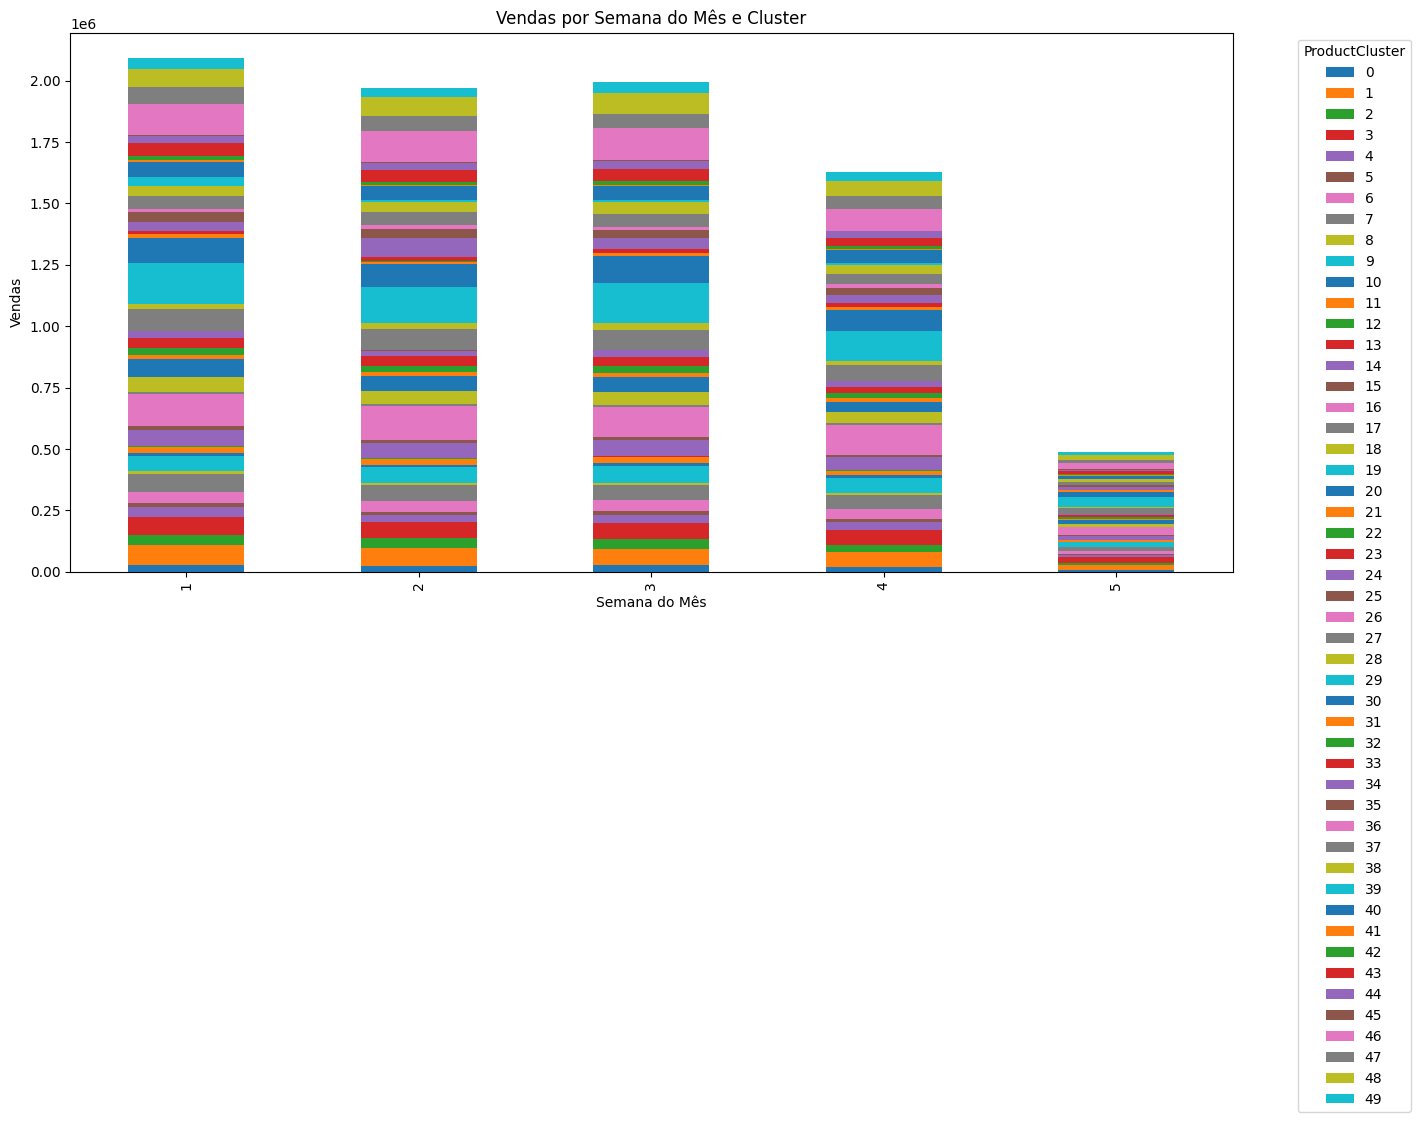

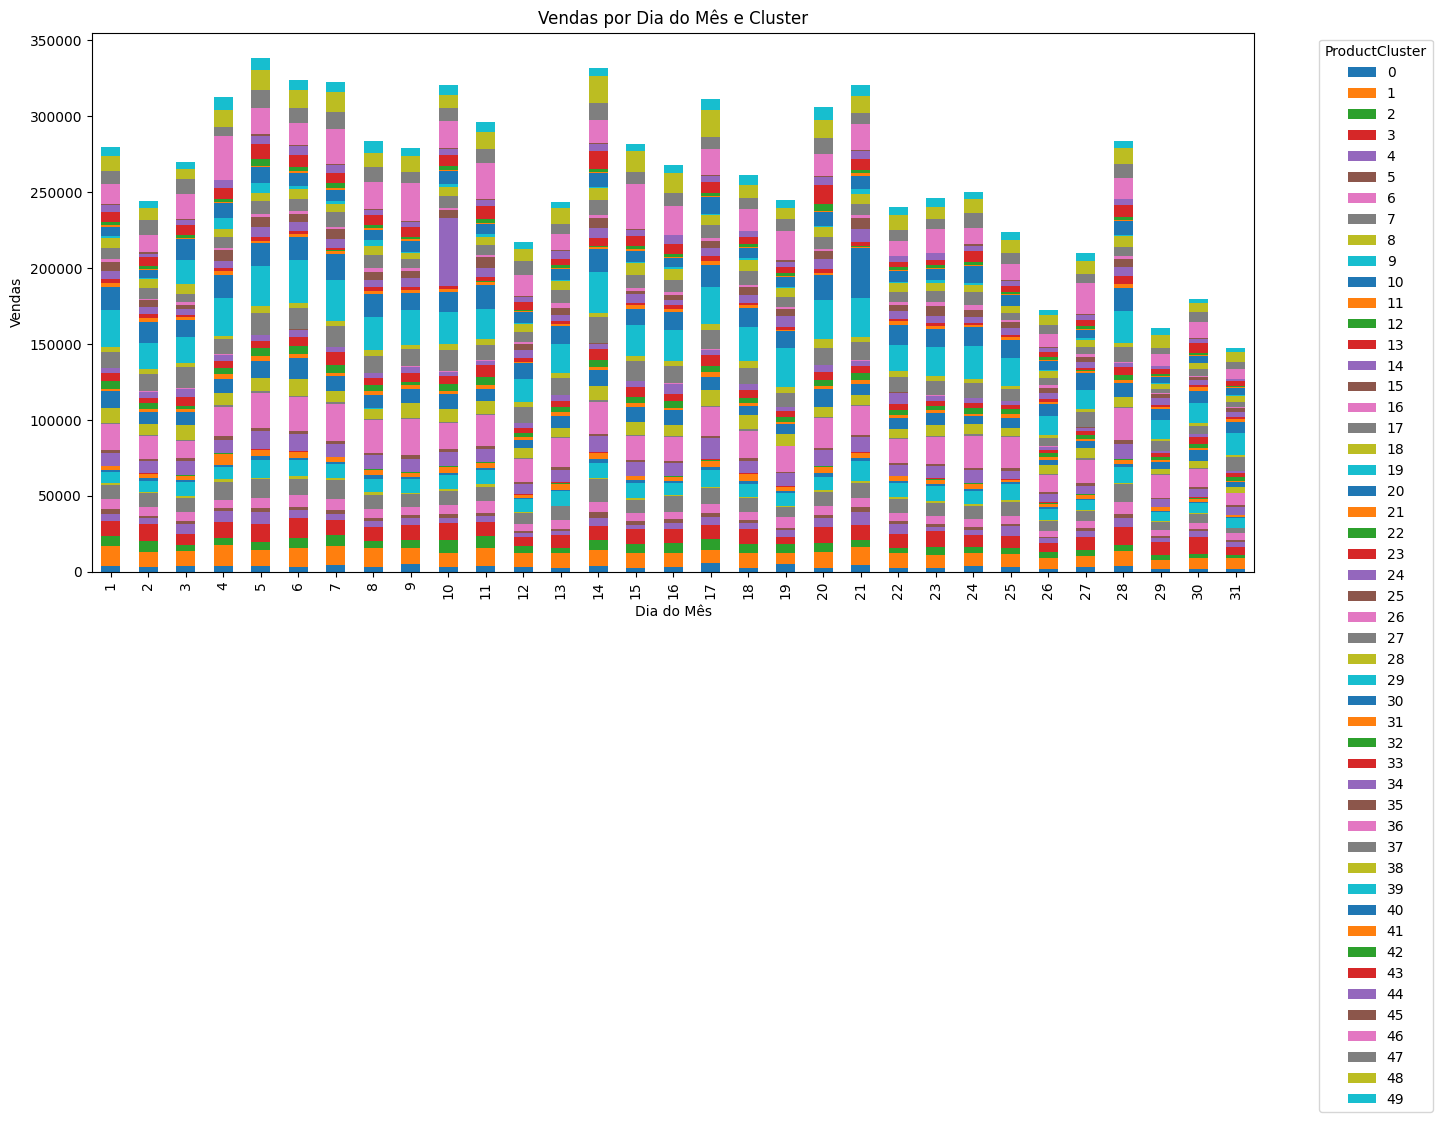

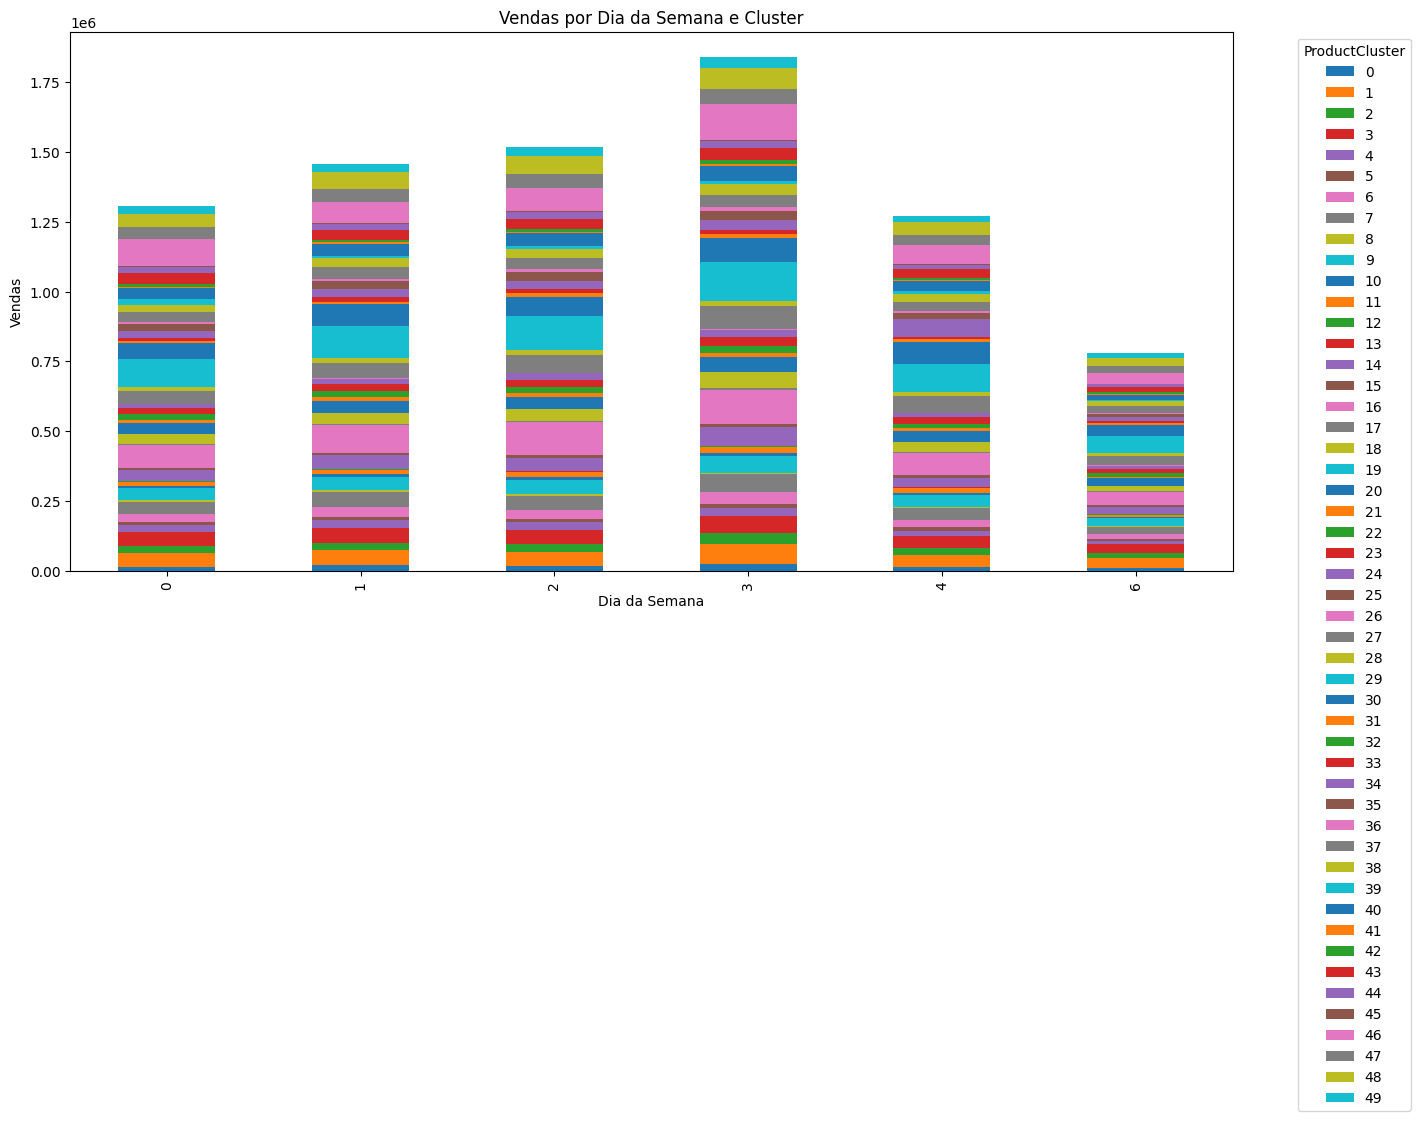

In [ ]:
# Vendas por Mês e Cluster
vendas_por_mes_cluster.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Vendas por Mês e Cluster')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend(title='ProductCluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Vendas por Semana do Mês e Cluster
vendas_por_semana_cluster.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Vendas por Semana do Mês e Cluster')
plt.xlabel('Semana do Mês')
plt.ylabel('Vendas')
plt.legend(title='ProductCluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Vendas por Dia do Mês e Cluster
vendas_por_dia_cluster.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Vendas por Dia do Mês e Cluster')
plt.xlabel('Dia do Mês')
plt.ylabel('Vendas')
plt.legend(title='ProductCluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Vendas por Dia da Semana e Cluster
vendas_por_dia_semana_cluster.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Vendas por Dia da Semana e Cluster')
plt.xlabel('Dia da Semana')
plt.ylabel('Vendas')
plt.legend(title='ProductCluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [96]:
# Agrupar por Mês e Cluster e somar as vendas
vendas_por_mes_cluster = df.groupby(['Month', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Ordenar dentro de cada mês e selecionar os top 3 clusters
top3_vendas_mes = vendas_por_mes_cluster.groupby('Month').apply(lambda x: x.nlargest(3, 'InvoiceTotal')).reset_index(drop=True)

top3_vendas_mes


Month  ProductCluster  InvoiceTotal
0       1              29      39505.99
1       1              27      32097.02
2       1              30      26990.17
3       2              29      40992.23
4       2              30      25905.40
5       2              27      24328.62
6       3              29      45376.69
7       3              46      41858.36
8       3              27      37503.55
9       4              46      37061.19
10      4              29      34779.17
11      4              16      26055.68
12      5              29      67609.90
13      5              16      58629.62
14      5              46      44298.45
15      6              29      55651.28
16      6              34      55137.90
17      6              16      54217.73
18      7              29      60071.20
19      7              16      51597.40
20      7              46      36795.65
21      8              16      69652.28
22      8              29      55920.49
23      8              48      31683.09
24      9              29      63486.01
25      9               3      57729.45
26      9              16      57114.64
27     10               3      70395.29
28     10              46      67884.47
29     10              30      59424.00
30     11               3      89215.13
31     11              16      69496.04
32     11              29      67221.87
33     12              20      63345.24
34     12              29      53304.17
35     12              27      46654.57

In [97]:
# Agrupar por Semana do Mês e Cluster e somar as vendas
vendas_por_semana_cluster = df.groupby(['WeekOfMonth', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Ordenar dentro de cada semana do mês e selecionar os top 3 clusters
top3_vendas_semana = vendas_por_semana_cluster.groupby('WeekOfMonth').apply(lambda x: x.nlargest(3, 'InvoiceTotal')).reset_index(drop=True)

top3_vendas_semana

WeekOfMonth  ProductCluster  InvoiceTotal
0             1              29     164214.20
1             1              16     132788.93
2             1              46     125535.23
3             2              29     146742.04
4             2              16     137544.03
5             2              46     124389.58
6             3              29     164941.40
7             3              46     130269.68
8             3              16     123458.92
9             4              29     122525.76
10            4              16     122122.61
11            4              46      89059.38
12            5              29      40706.70
13            5              16      34399.37
14            5              46      24841.89

In [98]:
# Agrupar por Dia do Mês e Cluster e somar as vendas
vendas_por_dia_cluster = df.groupby(['DayOfMonth', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Ordenar dentro de cada dia do mês e selecionar os top 3 clusters
top3_vendas_dia = vendas_por_dia_cluster.groupby('DayOfMonth').apply(lambda x: x.nlargest(3, 'InvoiceTotal')).reset_index(drop=True)

top3_vendas_dia


DayOfMonth  ProductCluster  InvoiceTotal
0            1              29      24115.72
1            1              16      17272.25
2            1              30      14936.94
3            2              29      16960.27
4            2              16      14966.77
..         ...             ...           ...
88          30              16      11505.81
89          30               3      11198.48
90          31              29      14377.66
91          31              27       9317.92
92          31              16       7910.03

[93 rows x 3 columns]

In [99]:
# Group by Day of the Week and Cluster and add up sales
# Agrupar por Dia da Semana e Cluster e somar as vendas
vendas_por_dia_semana_cluster = df.groupby(['DayOfWeek', 'ProductCluster'])['InvoiceTotal'].sum().reset_index()

# Sort within each day of the week and select the top 3 clusters
# Ordenar dentro de cada dia da semana e selecionar os top 3 clusters
top3_vendas_dia_semana = vendas_por_dia_semana_cluster.groupby('DayOfWeek').apply(lambda x: x.nlargest(3, 'InvoiceTotal')).reset_index(drop=True)

top3_vendas_dia_semana


DayOfWeek  ProductCluster  InvoiceTotal
0           0              29      98636.76
1           0              46      97558.85
2           0              16      81515.76
3           1              29     116381.94
4           1              16     100466.52
5           1              46      77491.43
6           2              29     123778.07
7           2              16     117435.21
8           2              46      83504.12
9           3              29     137350.62
10          3              46     129448.89
11          3              16     124283.08
12          4              29     102691.59
13          4              16      80082.41
14          4              30      78052.70
15          6              29      60291.12
16          6              16      46530.88
17          6              30      41756.66

Analyzing which product clusters have their average sales most modified per period

Analisando quais cluster de produtos tem sua venda média mais modificada por periodo

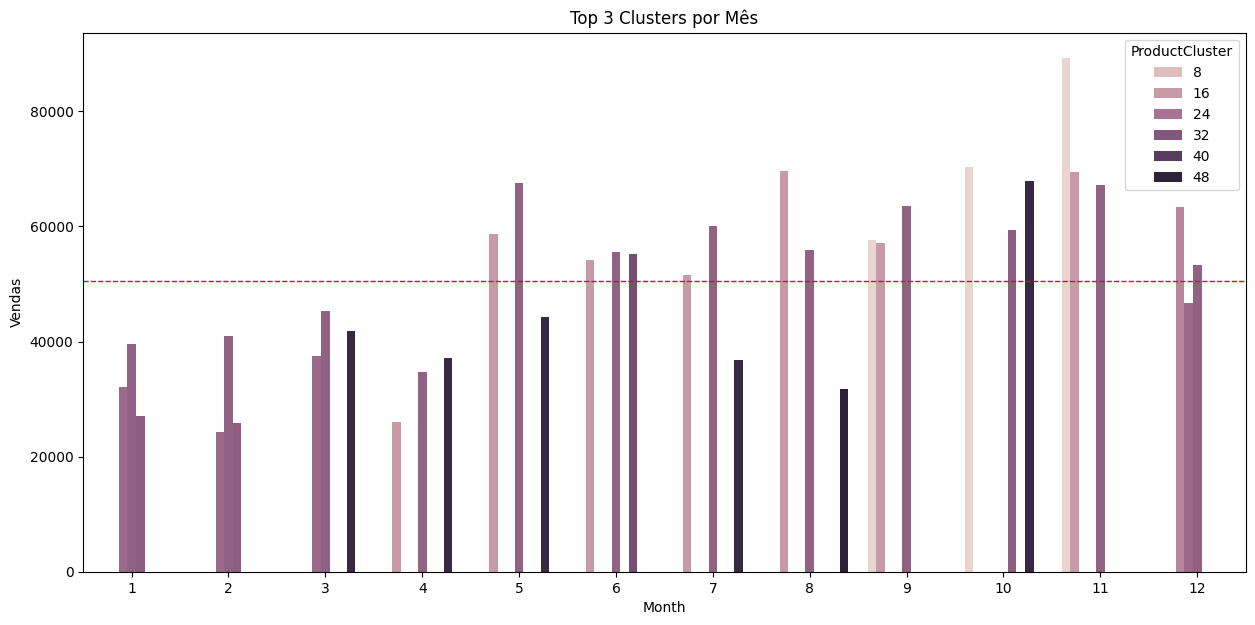

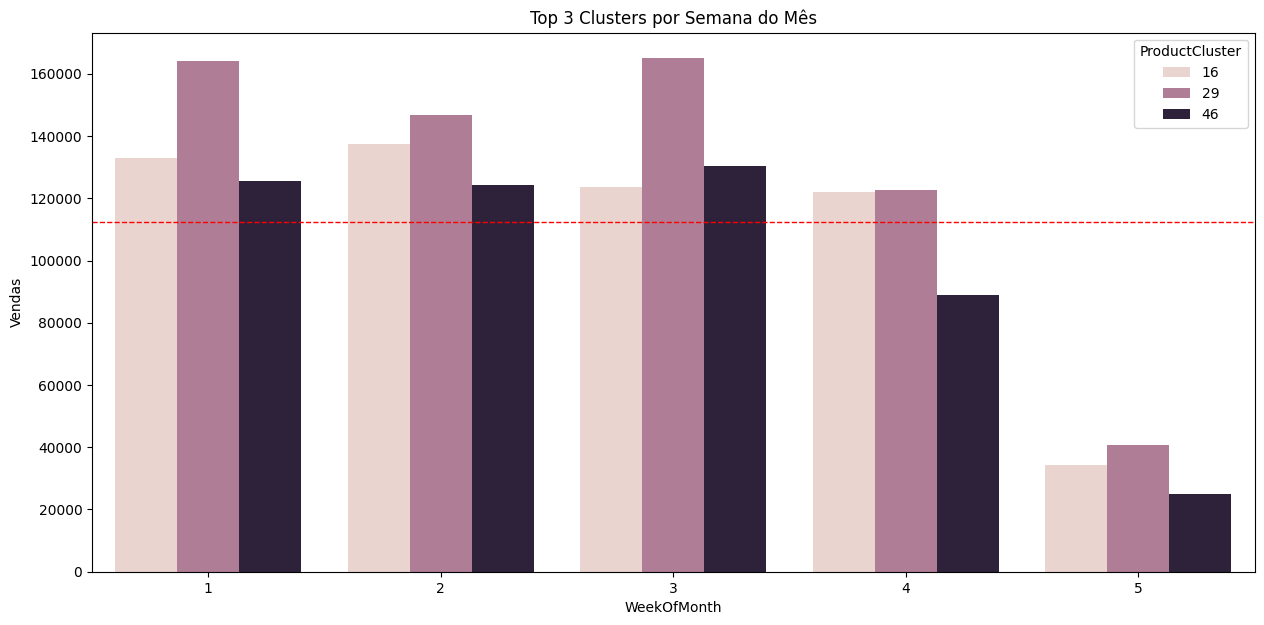

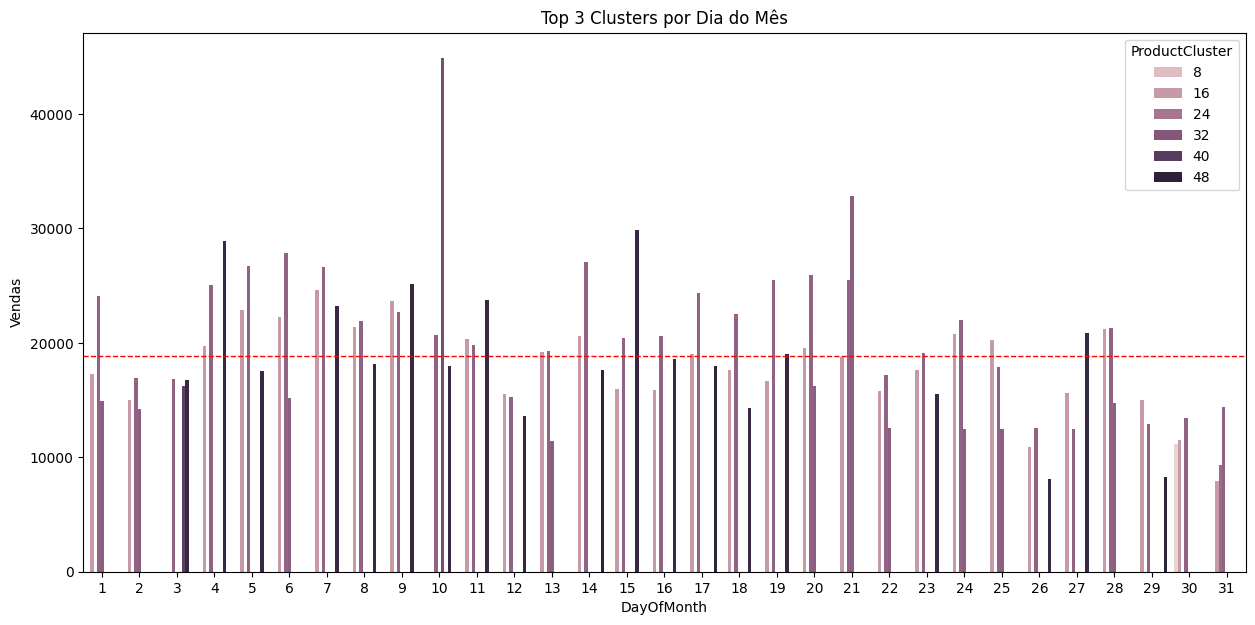

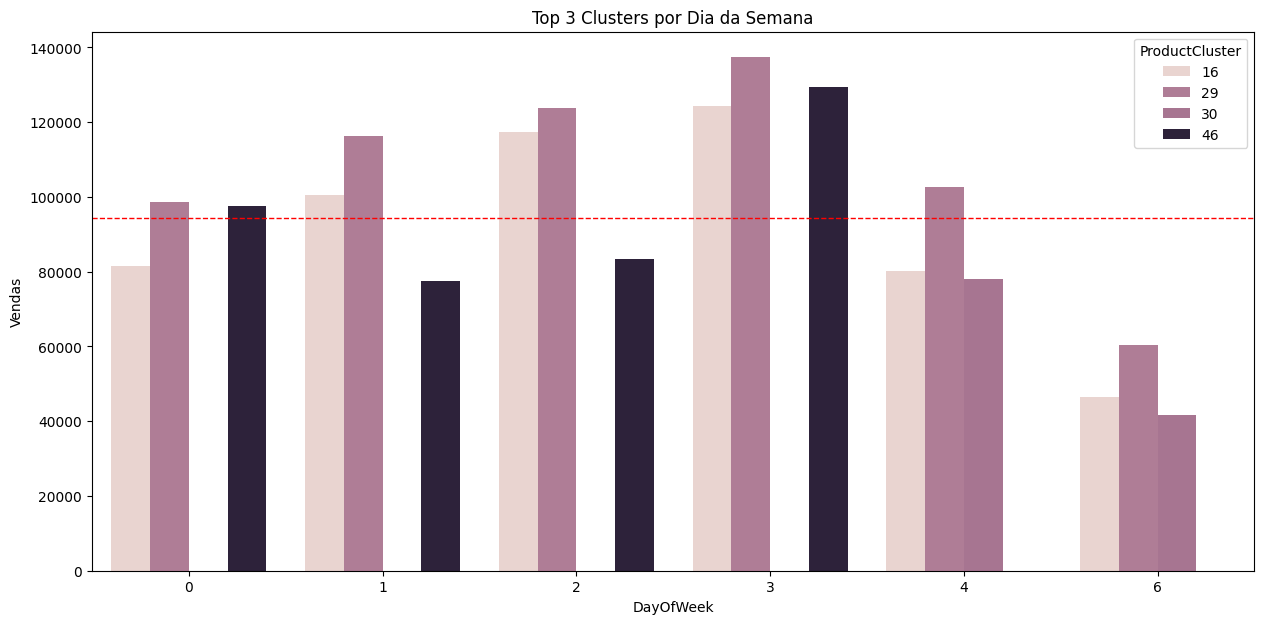

In [ ]:
# Função para visualizar Top 3 Clusters
def plot_top3_clusters(data, time_col, title):
    plt.figure(figsize=(15, 7))
    sns.barplot(x=time_col, y='InvoiceTotal', hue='ProductCluster', data=data)
    plt.title(title)
    plt.xlabel(time_col)
    plt.ylabel('Vendas')

    # Calcular a média de vendas por período 
    mean_sales = data.groupby(time_col)['InvoiceTotal'].mean().mean() 
    # Adicionar a média como uma linha horizontal 
    plt.axhline(y=mean_sales, color='r', linestyle='--', linewidth=1)
        
    plt.legend(title='ProductCluster')
    plt.show()

# Top 3 Clusters por Mês
plot_top3_clusters(top3_vendas_mes, 'Month', 'Top 3 Clusters por Mês')

# Top 3 Clusters por Semana do Mês
plot_top3_clusters(top3_vendas_semana, 'WeekOfMonth', 'Top 3 Clusters por Semana do Mês')

# Top 3 Clusters por Dia do Mês
plot_top3_clusters(top3_vendas_dia, 'DayOfMonth', 'Top 3 Clusters por Dia do Mês')

# Top 3 Clusters por Dia da Semana
plot_top3_clusters(top3_vendas_dia_semana, 'DayOfWeek', 'Top 3 Clusters por Dia da Semana')


In [100]:
# Se 'vendas_por_mes_cluster' já possui 'level_0' devido ao reset anterior, removeremos essa coluna primeiro 
if 'level_0' in vendas_por_mes_cluster.columns: 
    vendas_por_mes_cluster = vendas_por_mes_cluster.drop(columns=['level_0'])

# Resetando o índice para facilitar a manipulação
vendas_por_mes_cluster = vendas_por_mes_cluster.reset_index()

# Calcular a média anual de vendas para cada cluster
mean_yearly_sales = vendas_por_mes_cluster.groupby('ProductCluster')['InvoiceTotal'].mean()

# Adicionar a coluna 'DiffFromYearMean' ao DataFrame original
vendas_por_mes_cluster['DiffFromYearMean'] = vendas_por_mes_cluster.apply(
    lambda row: row['InvoiceTotal'] - mean_yearly_sales[row['ProductCluster']],
    axis=1
)

In [101]:
vendas_por_mes_cluster['PercentDiffFromYearMean'] = vendas_por_mes_cluster.apply(
    lambda row: ((row['InvoiceTotal'] - mean_yearly_sales[row['ProductCluster']]) / mean_yearly_sales[row['ProductCluster']]) * 100,
    axis=1
)


In [ ]:
if 'level_0' in vendas_por_semana_cluster.columns:
    vendas_por_semana_cluster = vendas_por_semana_cluster.drop(columns=['level_0'])

vendas_por_semana_cluster = vendas_por_semana_cluster.reset_index()

# Calculate the monthly average sales for each cluster
# Calcular a média mensal de vendas para cada cluster
mean_monthly_sales = vendas_por_semana_cluster.groupby('ProductCluster')['InvoiceTotal'].mean()

vendas_por_semana_cluster['DiffFromMonthMean'] = vendas_por_semana_cluster.apply(
    lambda row: row['InvoiceTotal'] - mean_monthly_sales[row['ProductCluster']],
    axis=1
)


In [210]:
vendas_por_semana_cluster['PercentDiffFromMonthMean'] = vendas_por_semana_cluster.apply(
    lambda row: ((row['InvoiceTotal'] - mean_monthly_sales[row['ProductCluster']]) / mean_monthly_sales[row['ProductCluster']]) * 100,
    axis=1
)

In [233]:
vendas_por_semana_cluster.sort_values(by='PercentDiffFromMonthMean', ascending=False).drop(columns=['level_0','index']).head(10).style.set_caption("Top 10 Vendas a mais por Semana do Mês")

In [ ]:
if 'level_0' in vendas_por_dia_cluster.columns:
    vendas_por_dia_cluster = vendas_por_dia_cluster.drop(columns=['level_0'])

vendas_por_dia_cluster = vendas_por_dia_cluster.reset_index()


# Calcular a média mensal de vendas para cada cluster
mean_daily_sales = vendas_por_dia_cluster.groupby('ProductCluster')['InvoiceTotal'].mean()

vendas_por_dia_cluster['DiffFromDailyMean'] = vendas_por_dia_cluster.apply(
    lambda row: row['InvoiceTotal'] - mean_daily_sales[row['ProductCluster']],
    axis=1
)

vendas_por_dia_cluster['PercentDiffFromDailyMean'] = vendas_por_dia_cluster.apply(
    lambda row: ((row['InvoiceTotal'] - mean_daily_sales[row['ProductCluster']]) / mean_daily_sales[row['ProductCluster']]) * 100,
    axis=1
)

In [ ]:
vendas_por_dia_cluster.drop(columns=['index']).sort_values(by='PercentDiffFromDailyMean',ascending=False).head(10).style.set_caption("Top 10 Vendas a mais por dia do Mês")

In [ ]:
if 'level_0' in vendas_por_dia_semana_cluster.columns:
    vendas_por_dia_semana_cluster = vendas_por_dia_semana_cluster.drop(columns=['level_0'])

vendas_por_dia_semana_cluster = vendas_por_dia_semana_cluster.reset_index()

# Calculate the monthly average of sales for each cluster 
# Calcular a média mensal de vendas para cada cluster
mean_weekly_sales = vendas_por_dia_semana_cluster.groupby('ProductCluster')['InvoiceTotal'].mean()

vendas_por_dia_semana_cluster['DiffFromWeeklyMean'] = vendas_por_dia_semana_cluster.apply(
    lambda row: row['InvoiceTotal'] - mean_daily_sales[row['ProductCluster']],
    axis=1
)

vendas_por_dia_semana_cluster['PercentDiffFromWeeklyMean'] = vendas_por_dia_semana_cluster.apply(
    lambda row: ((row['InvoiceTotal'] - mean_weekly_sales[row['ProductCluster']]) / mean_weekly_sales[row['ProductCluster']]) * 100,
    axis=1
)

In [ ]:
vendas_por_dia_semana_cluster.drop(columns=['index']).sort_values(by='PercentDiffFromWeeklyMean',ascending=False).head(10).style.set_caption("Top 10 Vendas a mais por dia da Semana")

# Modelagem

### Normalização

In [ ]:
# Select columns for normalization
# Selecionar colunas para normalização
rfm_values = rfm[['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV']]

# Apply Min-Max Scaling
# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
rfm_normalized = scaler.fit_transform(rfm_values)
df_rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])

# Add the Client ID back to the Normalized DataFrame
# Adicionar o ID do Cliente de volta ao DataFrame Normalizado
df_rfm_normalized['CustomerID'] = rfm['CustomerID']

# Verificar o DataFrame Normalizado
#print(df_rfm_normalized.head())


In [276]:
df_rfm_normalized

Recency  Frequency  Monetary       AIO    Tenure       AOV  CustomerID  \
0     0.002681   0.028846  0.016368  0.083942  0.006472  0.046067     12347.0   
1     0.198391   0.014423  0.006819  0.019307  0.029126  0.033558     12348.0   
2     0.048257   0.000000  0.006668  0.241754  0.000000  0.131903     12349.0   
3     0.828418   0.000000  0.001260  0.053723  0.000000  0.024920     12350.0   
4     0.093834   0.033654  0.009512  0.031478  0.009709  0.023330     12352.0   
...        ...        ...       ...       ...       ...       ...         ...   
4320  0.742627   0.000000  0.000675  0.030219  0.000000  0.013358     18280.0   
4321  0.482574   0.000000  0.000296  0.020146  0.000000  0.005858     18281.0   
4322  0.018767   0.004808  0.000666  0.016788  0.032362  0.006474     18282.0   
4323  0.008043   0.072115  0.007762  0.141233  0.000000  0.009393     18283.0   
4324  0.112601   0.009615  0.006971  0.072750  0.006472  0.045820     18287.0   

      ClientCluster  
0                 0  
1                 4  
2                 2  
3                 3  
4                 0  
...             ...  
4320              3  
4321              1  
4322              0  
4323              0  
4324              0  

[4325 rows x 8 columns]

### Determining the number of client clusters
### Determinando o número de clusters para clientes

Calculando para k=2
Calculando para k=1
Calculando para k=3
Calculando para k=4
Calculando para k=5
Calculando para k=6
Calculando para k=7
Calculando para k=9
Calculando para k=11
Calculando para k=10
Calculando para k=13
Calculando para k=16
Calculando para k=12
Calculando para k=15
Calculando para k=14
Calculando para k=8
Calculando para k=17
Calculando para k=18
Calculando para k=19


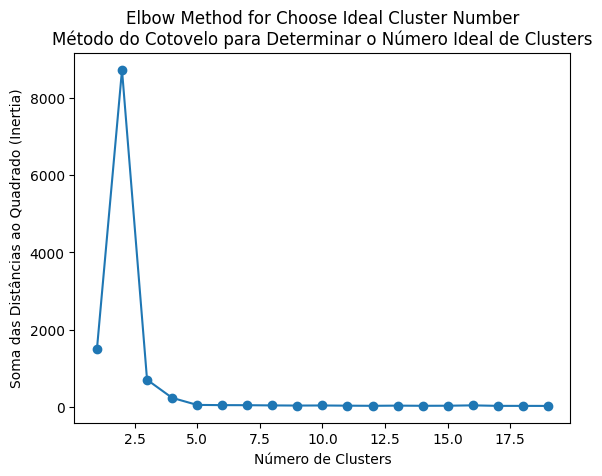

In [159]:

# Function to run K-Means and calculate inertia
# Função para rodar K-Means e calcular inercia
def calculate_inertia(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_rfm_normalized.drop(columns=['CustomerID']))
    return k, kmeans.inertia_

# Elbow Method for Determining the Optimal Number of Clusters
# Método do Cotovelo para determinar o número ideal de clusters
k_range = range(1, 20,1)
sse = []
log = []

#Used ThreadPoolExecutor for paralel processing
# Usar ThreadPoolExecutor para paralelismo
with ThreadPoolExecutor(max_workers=None) as executor:
    futures = {executor.submit(calculate_inertia, k): k for k in k_range}
    for future in as_completed(futures):
        k, inertia = future.result()
        sse.append(inertia)
        log.append(f'Calculando para k={k}')
        print(f'Calculando para k={k}')  # Print para acompanhar

#Plot the chart of Elbow Technic 
# Plotar o gráfico da técnica do cotovelo
plt.plot(sorted(k_range), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias ao Quadrado (Inertia)')
plt.title('Elbow Method for Choose Ideal Cluster Number\nMétodo do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()



### Modeling
### Modelagem

In [339]:
model = KMeans(n_clusters=6, n_init='auto')
model.fit(df_rfm_normalized.drop(columns='CustomerID'))
df_rfm_normalized['ClientCluster'] = model.predict(df_rfm_normalized.drop(columns='CustomerID'))

In [166]:
df_rfm_normalized.describe()

Recency    Frequency     Monetary          AIO       Tenure  \
count  4325.000000  4325.000000  4325.000000  4325.000000  4325.000000   
mean      0.245580     0.015668     0.007169     0.069078     0.008762   
std       0.268104     0.036815     0.028532     0.064049     0.030306   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.045576     0.000000     0.001145     0.028540     0.000000   
50%       0.134048     0.004808     0.002503     0.053723     0.003236   
75%       0.380697     0.019231     0.006198     0.089818     0.006472   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               AOV    CustomerID  ClientCluster  
count  4325.000000   4325.000000    4325.000000  
mean      0.027471  15299.898035       1.830058  
std       0.031663   1721.735735       1.392634  
min       0.000000  12347.000000       0.000000  
25%       0.013092  13813.000000       1.000000  
50%       0.021542  15299.000000       1.000000  
75%       0.031639  16779.000000       3.000000  
max       1.000000  18287.000000       4.000000

Let's take the outliers out

Vamos tirar os outliers da base

In [173]:
#Calculate the skewness and kurtosis
# Calcular a assimetria e a curtose
#Drop the ClientID cause its not a variable to be analysed
for column in df_rfm_normalized.drop(columns=["CustomerID"],axis=0).columns:

    skewness = df_rfm_normalized[column].skew()
    kurtosis = df_rfm_normalized[column].kurtosis()
    print(column)
    print(f'Assimetria: {skewness}')
    print(f'Curtose: {kurtosis}')


Recency
Assimetria: 1.2433455230522228
Curtose: 0.4225413298816152
Frequency
Assimetria: 12.202356314592588
Curtose: 254.5213622767368
Monetary
Assimetria: 20.39416899785498
Curtose: 559.0652142853324
AIO
Assimetria: 3.073099937889759
Curtose: 20.7615534594376
Tenure
Assimetria: 15.63695351106158
Curtose: 379.8915076822182
AOV
Assimetria: 10.738426890189391
Curtose: 239.35424777033302
ClientCluster
Assimetria: 0.5713592258104273
Curtose: -1.1507918394757912


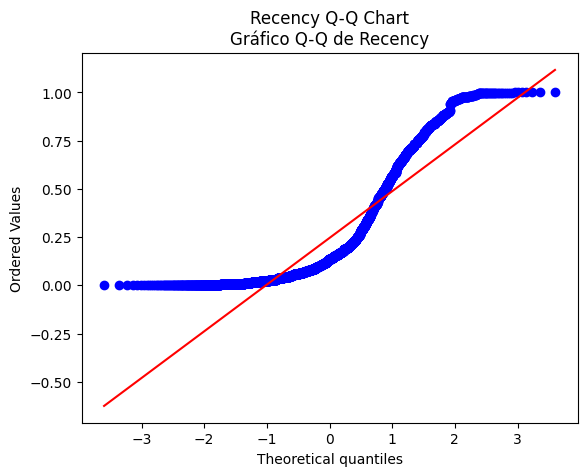

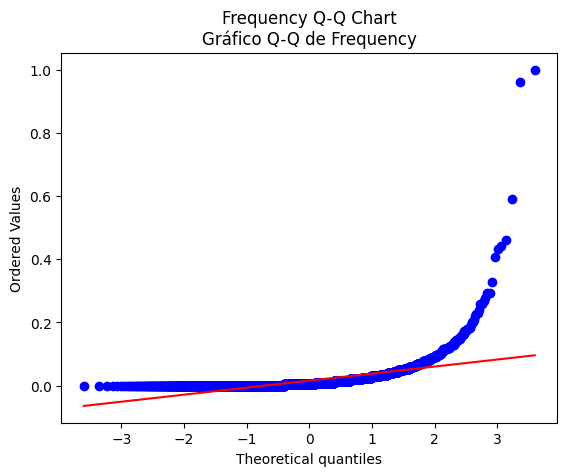

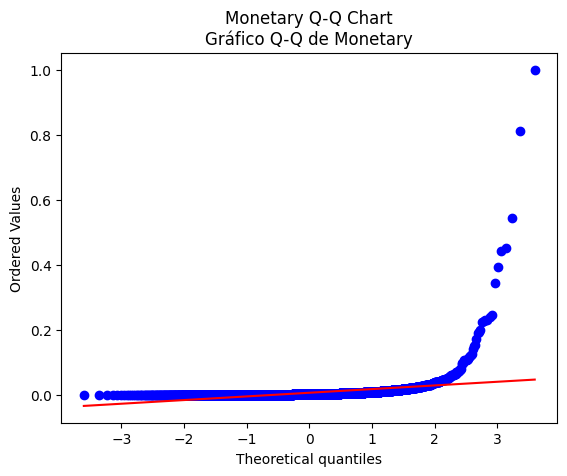

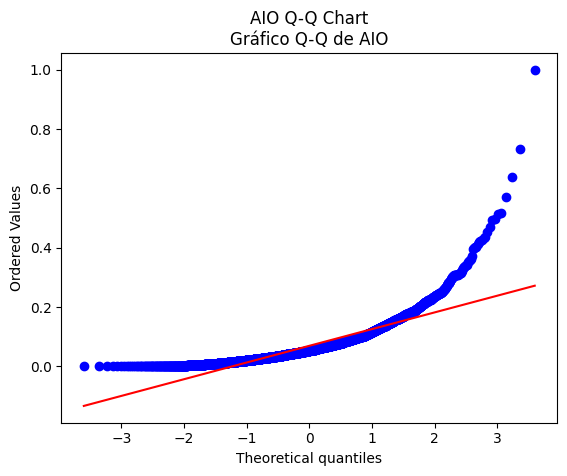

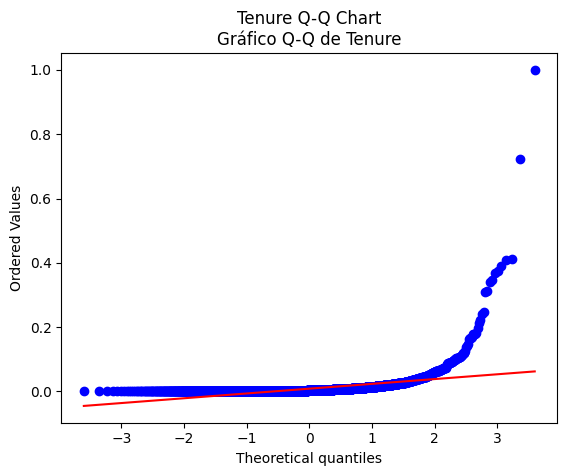

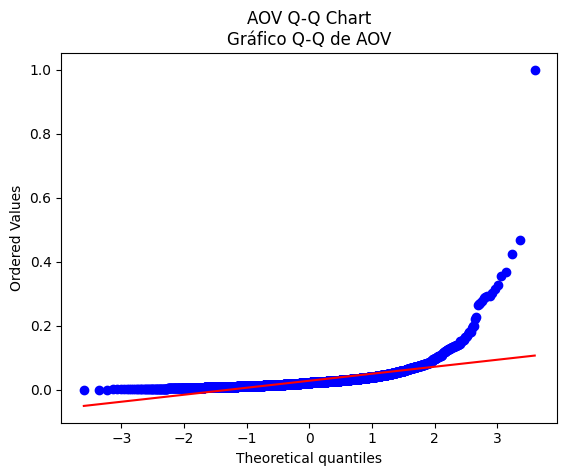

In [ ]:
for column in df_rfm_normalized.drop(columns=["CustomerID","ClientCluster"],axis=0).columns:

    stats.probplot(df_rfm_normalized[column], dist="norm", plot=plt)
    plt.title(f'{column} Q-Q Chart\nGráfico Q-Q de {column}')
    plt.show()


Vamos utilizar outra técnica de normalização

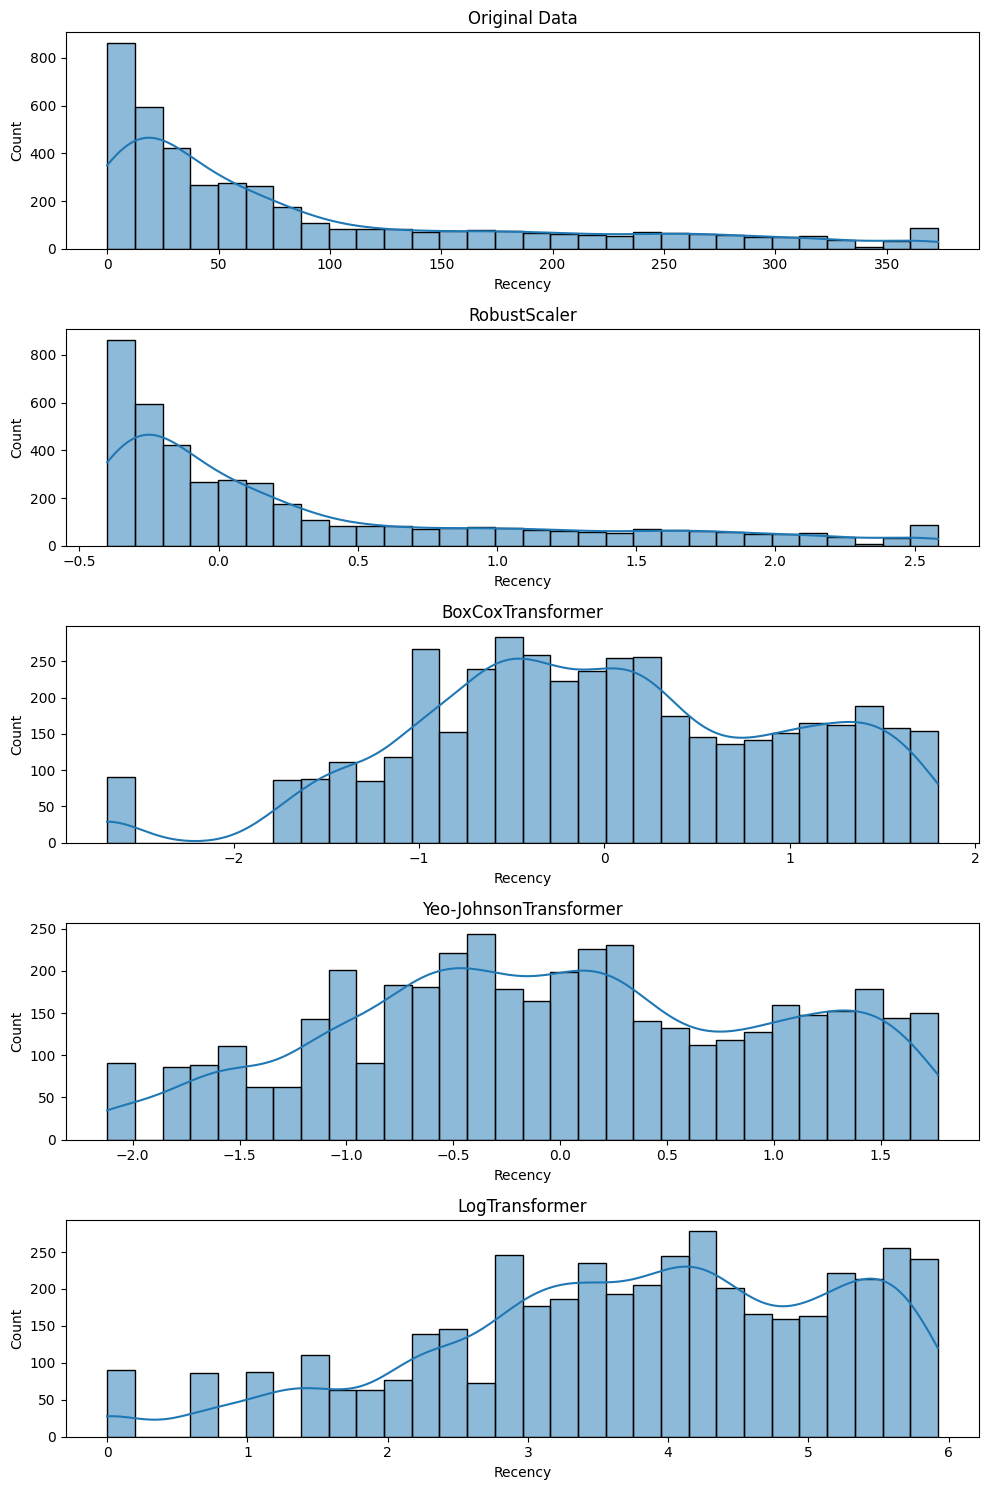

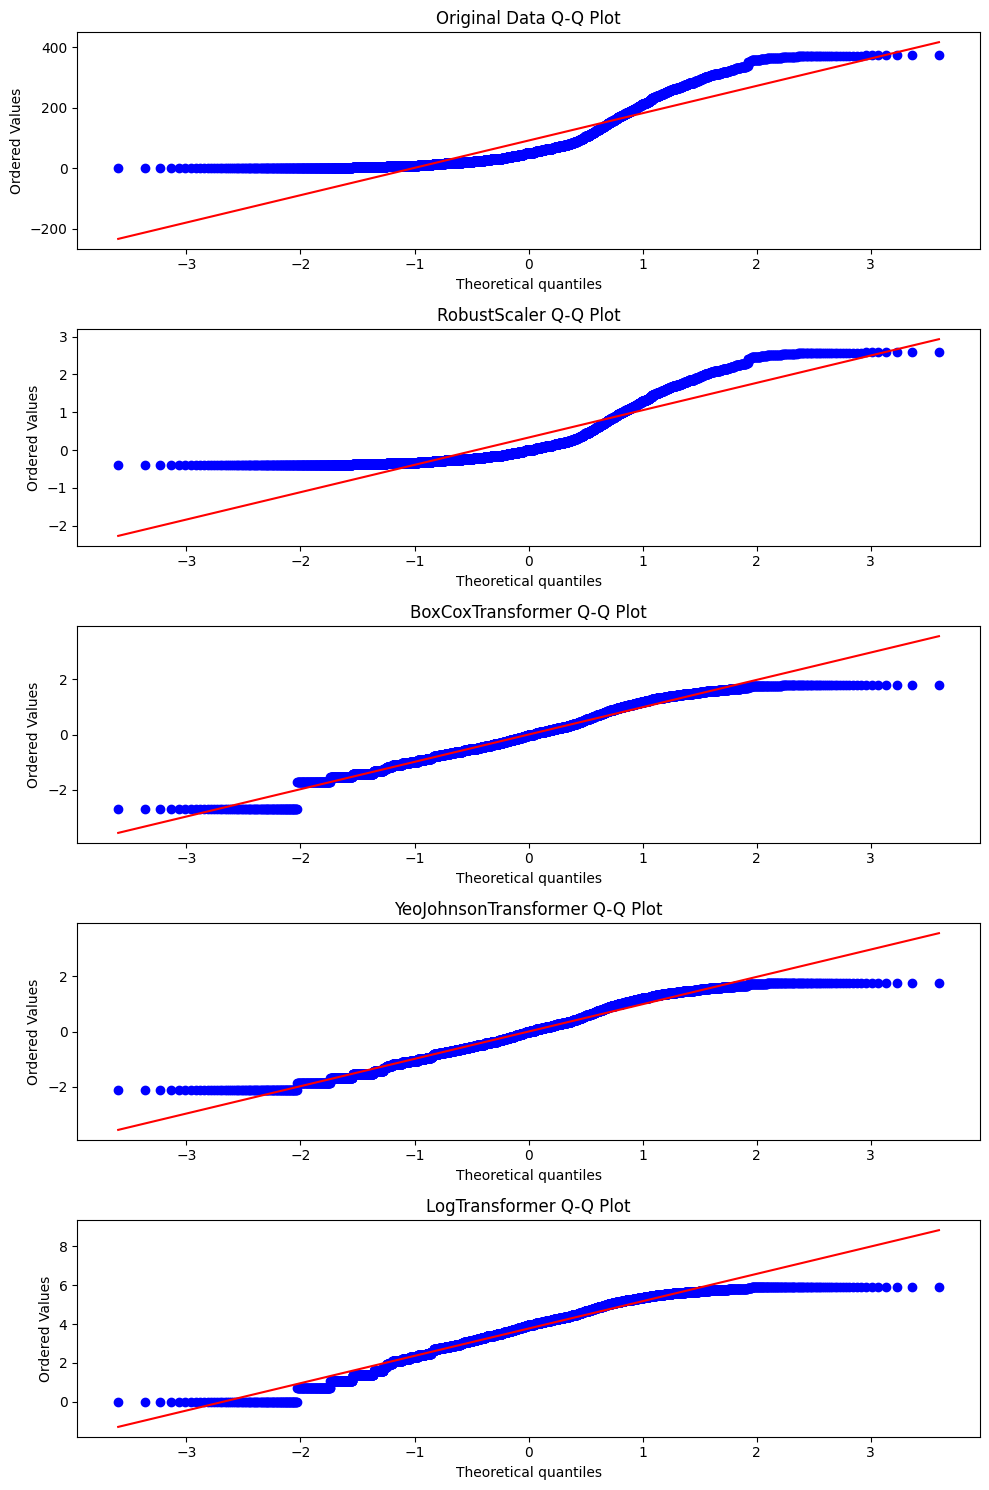

In [ ]:


# Select columns for normalization
# Selecionar colunas para normalização
rfm_values = rfm[['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV']]

# Apply Min-Max Scaling
# Aplicar Min-Max Scaling
robust = RobustScaler()
boxcox =PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')
rfm_robust= robust.fit_transform((rfm_values+0.000001))
rfm_boxcox = boxcox.fit_transform((rfm_values+0.000001))
rfm_yeo_johnson = yeo_johnson.fit_transform((rfm_values+0.000001))
rfm_log = np.log1p((rfm_values+0.000001))
df_rfm_robust = pd.DataFrame(rfm_robust, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_boxcox = pd.DataFrame(rfm_boxcox, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_yeo_johnson = pd.DataFrame(rfm_yeo_johnson, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_log = pd.DataFrame(rfm_log,columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
# Add the Client ID back to the Normalized DataFrame
# Adicionar o ID do Cliente de volta ao DataFrame Normalizado
#df_rfm_normalized['CustomerID'] = rfm['CustomerID']

# Histogramas 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0]) 
axes[0].set_title('Original Data') 
sns.histplot(df_rfm_robust['Recency'], bins=30, kde=True, ax=axes[1]) 
axes[1].set_title('RobustScaler') 
sns.histplot(df_rfm_boxcox['Recency'], bins=30, kde=True, ax=axes[2]) 
axes[2].set_title('BoxCoxTransformer') 
sns.histplot(df_rfm_yeo_johnson['Recency'], bins=30, kde=True, ax=axes[3]) 
axes[3].set_title('Yeo-JohnsonTransformer') 
sns.histplot(df_rfm_log['Recency'], bins=30, kde=True, ax=axes[4]) 
axes[4].set_title('LogTransformer') 
plt.tight_layout() 
plt.show()

# Gráficos Q-Q 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
stats.probplot(rfm['Recency'], dist="norm", plot=axes[0]) 
axes[0].set_title('Original Data Q-Q Plot') 
stats.probplot(df_rfm_robust['Recency'], dist="norm", plot=axes[1]) 
axes[1].set_title('RobustScaler Q-Q Plot') 
stats.probplot(df_rfm_boxcox['Recency'], dist="norm", plot=axes[2]) 
axes[2].set_title('BoxCoxTransformer Q-Q Plot') 
stats.probplot(df_rfm_yeo_johnson['Recency'], dist="norm", plot=axes[3]) 
axes[3].set_title('YeoJohnsonTransformer Q-Q Plot') 
stats.probplot(df_rfm_log['Recency'], dist="norm", plot=axes[4]) 
axes[4].set_title('LogTransformer Q-Q Plot') 
plt.tight_layout()
plt.show()
# Verificar o DataFrame Normalizado
#print(df_rfm_normalized.head())

In [224]:
df_rfm_yeo_johnson['ClientCluster'] = df_rfm_normalized['ClientCluster']

In [228]:
#Calculate the skewness and kurtosis
# Calcular a assimetria e a curtose
#Drop the ClientID cause its not a variable to be analysed
for column in df_rfm_yeo_johnson.drop(columns=['ClientCluster'],axis=0).columns:

    skewness = df_rfm_yeo_johnson[column].skew()
    kurtosis = df_rfm_yeo_johnson[column].kurtosis()
    print(column)
    print(f'Assimetria: {skewness}')
    print(f'Curtose: {kurtosis}')

Recency
Assimetria: -0.08415050079832873
Curtose: -0.8835000902703629
Frequency
Assimetria: 0.21555844931628143
Curtose: -1.4480420248030337
Monetary
Assimetria: -0.022227045444731027
Curtose: -0.5883207510765427
AIO
Assimetria: -0.032325473707808396
Curtose: -0.2849989508769779
Tenure
Assimetria: 0.31686405775496834
Curtose: -1.671666534201371
AOV
Assimetria: -0.01009683945512786
Curtose: -0.19444038859415747


Retirando os outliers e renormalizando 

In [322]:
# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = rfm.quantile(0.25)
Q3 = rfm.quantile(0.75)
IQR = Q3 - Q1

fator = 2

# Filtrar os dados que estão dentro do intervalo aceitável
df_rfm_no_outliers = rfm[~((rfm < (Q1 - fator * IQR)) | (rfm > (Q3 + fator * IQR))).any(axis=1)]

print(f"DataFrame original: {rfm.shape}")
print(f"DataFrame sem outliers: {df_rfm_no_outliers.shape}")



DataFrame original: (4325, 7)
DataFrame sem outliers: (3346, 7)


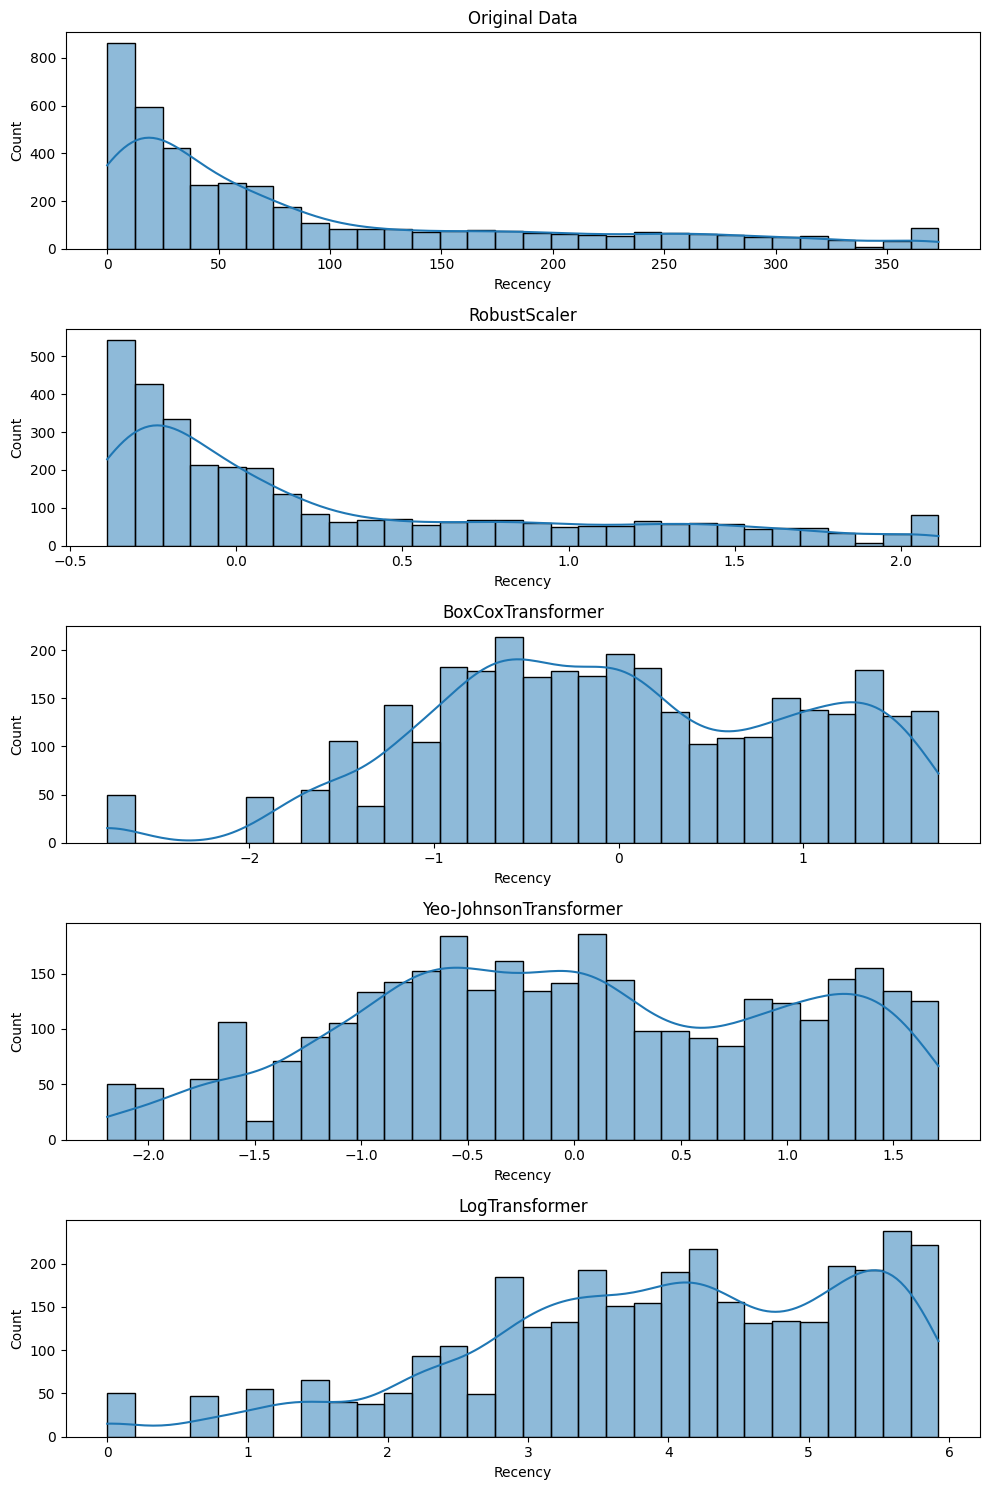

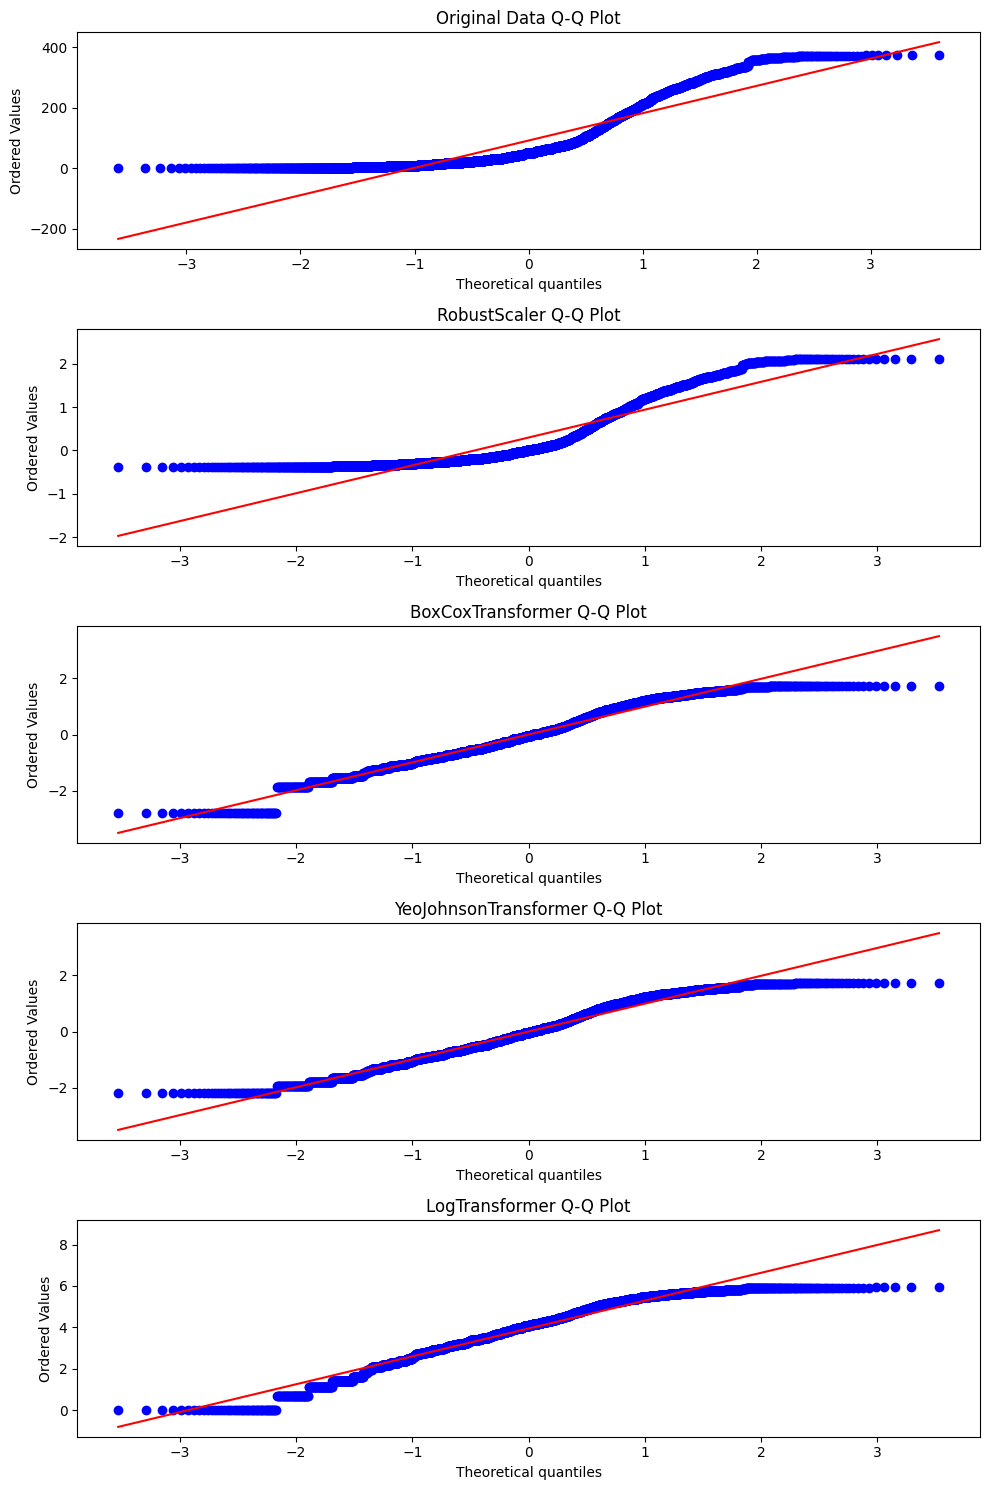

In [323]:
# Select columns for normalization
# Selecionar colunas para normalização
rfm_values = df_rfm_no_outliers[['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV']]

# Apply Min-Max Scaling
# Aplicar Min-Max Scaling
robust = RobustScaler()
boxcox =PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')
rfm_robust= robust.fit_transform((rfm_values+0.000001))
rfm_boxcox = boxcox.fit_transform((rfm_values+0.000001))
rfm_yeo_johnson = yeo_johnson.fit_transform((rfm_values+0.000001))
rfm_log = np.log1p((rfm_values+0.000001))
df_rfm_robust = pd.DataFrame(rfm_robust, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_boxcox = pd.DataFrame(rfm_boxcox, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_yeo_johnson = pd.DataFrame(rfm_yeo_johnson, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_log = pd.DataFrame(rfm_log,columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
# Add the Client ID back to the Normalized DataFrame
# Adicionar o ID do Cliente de volta ao DataFrame Normalizado
#df_rfm_normalized['CustomerID'] = rfm['CustomerID']

# Histogramas 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0]) 
axes[0].set_title('Original Data') 
sns.histplot(df_rfm_robust['Recency'], bins=30, kde=True, ax=axes[1]) 
axes[1].set_title('RobustScaler') 
sns.histplot(df_rfm_boxcox['Recency'], bins=30, kde=True, ax=axes[2]) 
axes[2].set_title('BoxCoxTransformer') 
sns.histplot(df_rfm_yeo_johnson['Recency'], bins=30, kde=True, ax=axes[3]) 
axes[3].set_title('Yeo-JohnsonTransformer') 
sns.histplot(df_rfm_log['Recency'], bins=30, kde=True, ax=axes[4]) 
axes[4].set_title('LogTransformer') 
plt.tight_layout() 
plt.show()

# Gráficos Q-Q 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
stats.probplot(rfm['Recency'], dist="norm", plot=axes[0]) 
axes[0].set_title('Original Data Q-Q Plot') 
stats.probplot(df_rfm_robust['Recency'], dist="norm", plot=axes[1]) 
axes[1].set_title('RobustScaler Q-Q Plot') 
stats.probplot(df_rfm_boxcox['Recency'], dist="norm", plot=axes[2]) 
axes[2].set_title('BoxCoxTransformer Q-Q Plot') 
stats.probplot(df_rfm_yeo_johnson['Recency'], dist="norm", plot=axes[3]) 
axes[3].set_title('YeoJohnsonTransformer Q-Q Plot') 
stats.probplot(df_rfm_log['Recency'], dist="norm", plot=axes[4]) 
axes[4].set_title('LogTransformer Q-Q Plot') 
plt.tight_layout()
plt.show()

In [324]:
#Calculate the skewness and kurtosis
# Calcular a assimetria e a curtose
#Drop the ClientID cause its not a variable to be analysed
for column in df_rfm_yeo_johnson.columns:

    skewness = df_rfm_yeo_johnson[column].skew()
    kurtosis = df_rfm_yeo_johnson[column].kurtosis()
    print(column)
    print(f'Assimetria: {skewness}')
    print(f'Curtose: {kurtosis}')

Recency
Assimetria: -0.08291319352186409
Curtose: -0.9008962286674329
Frequency
Assimetria: 0.22188830243001698
Curtose: -1.4314921402978589
Monetary
Assimetria: -0.01596200164211954
Curtose: -0.5367602581357751
AIO
Assimetria: -0.019032465751122232
Curtose: -0.21626437430160017
Tenure
Assimetria: 0.3338481215416782
Curtose: -1.6436462156911908
AOV
Assimetria: 0.007383765016077852
Curtose: 0.023740307449936715


Retirar os outliers não ajuda na normalização.

In [325]:
#Normalizando e retirando os outliers
# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_rfm_normalized.quantile(0.25)
Q3 = df_rfm_normalized.quantile(0.75)
IQR = Q3 - Q1

fator = 2
# Filtrar os dados que estão dentro do intervalo aceitável
df_rfm_normalized_no_outliers = df_rfm_normalized[~((df_rfm_normalized < (Q1 - fator * IQR)) | (df_rfm_normalized > (Q3 + fator * IQR))).any(axis=1)]

print(f"DataFrame original: {df_rfm_normalized.shape}")
print(f"DataFrame sem outliers: {df_rfm_normalized_no_outliers.shape}")

DataFrame original: (4325, 8)
DataFrame sem outliers: (3346, 8)


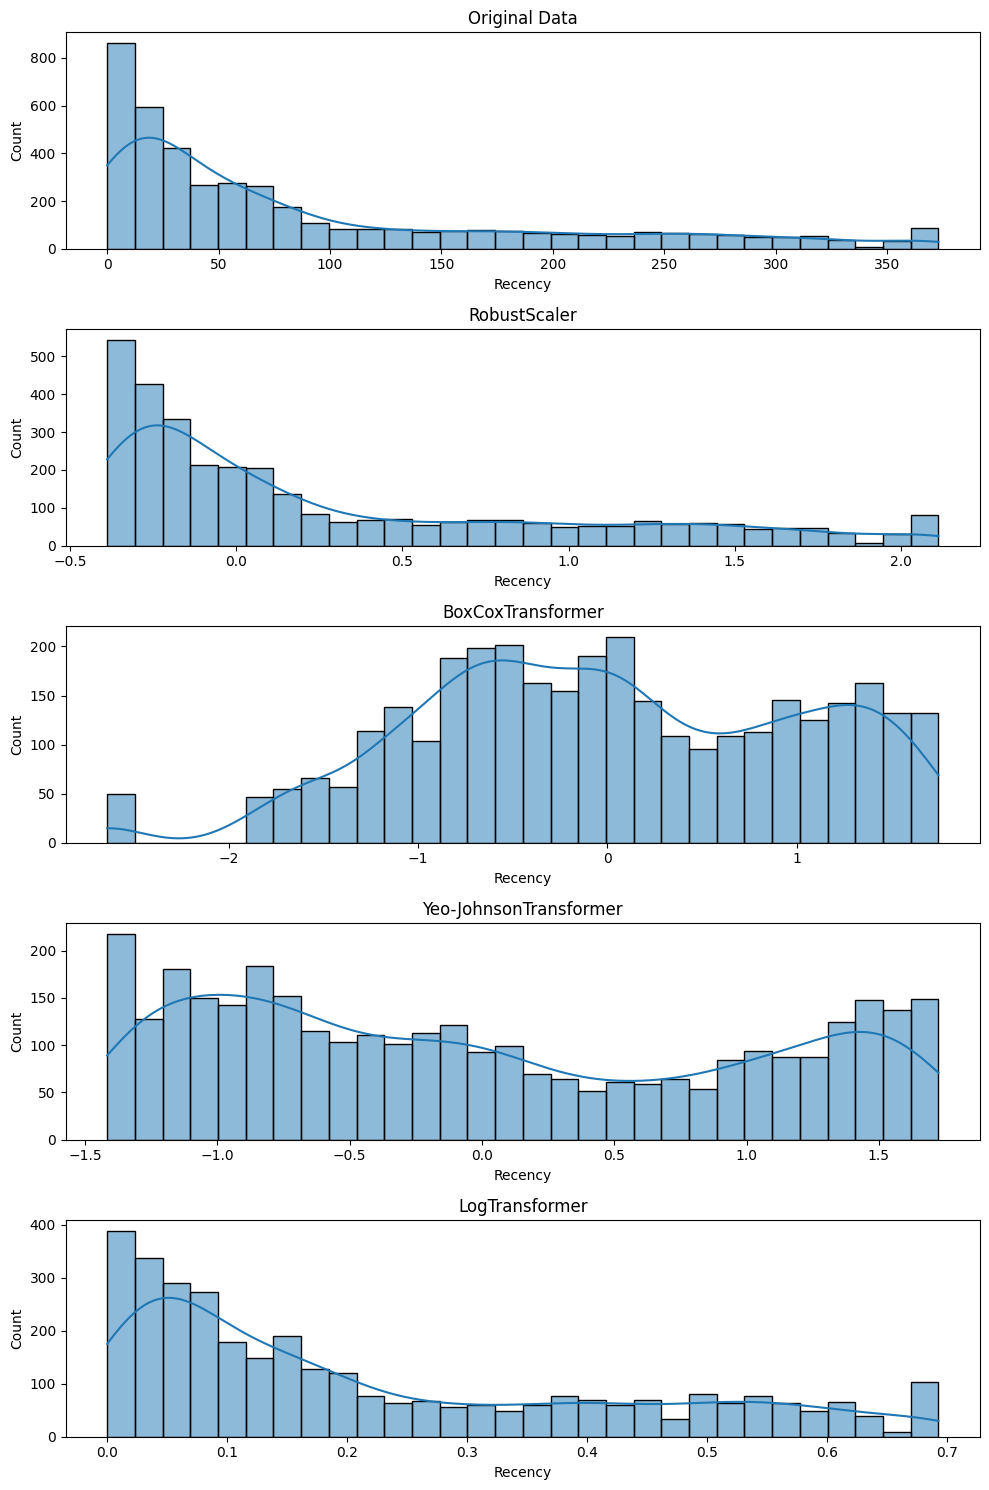

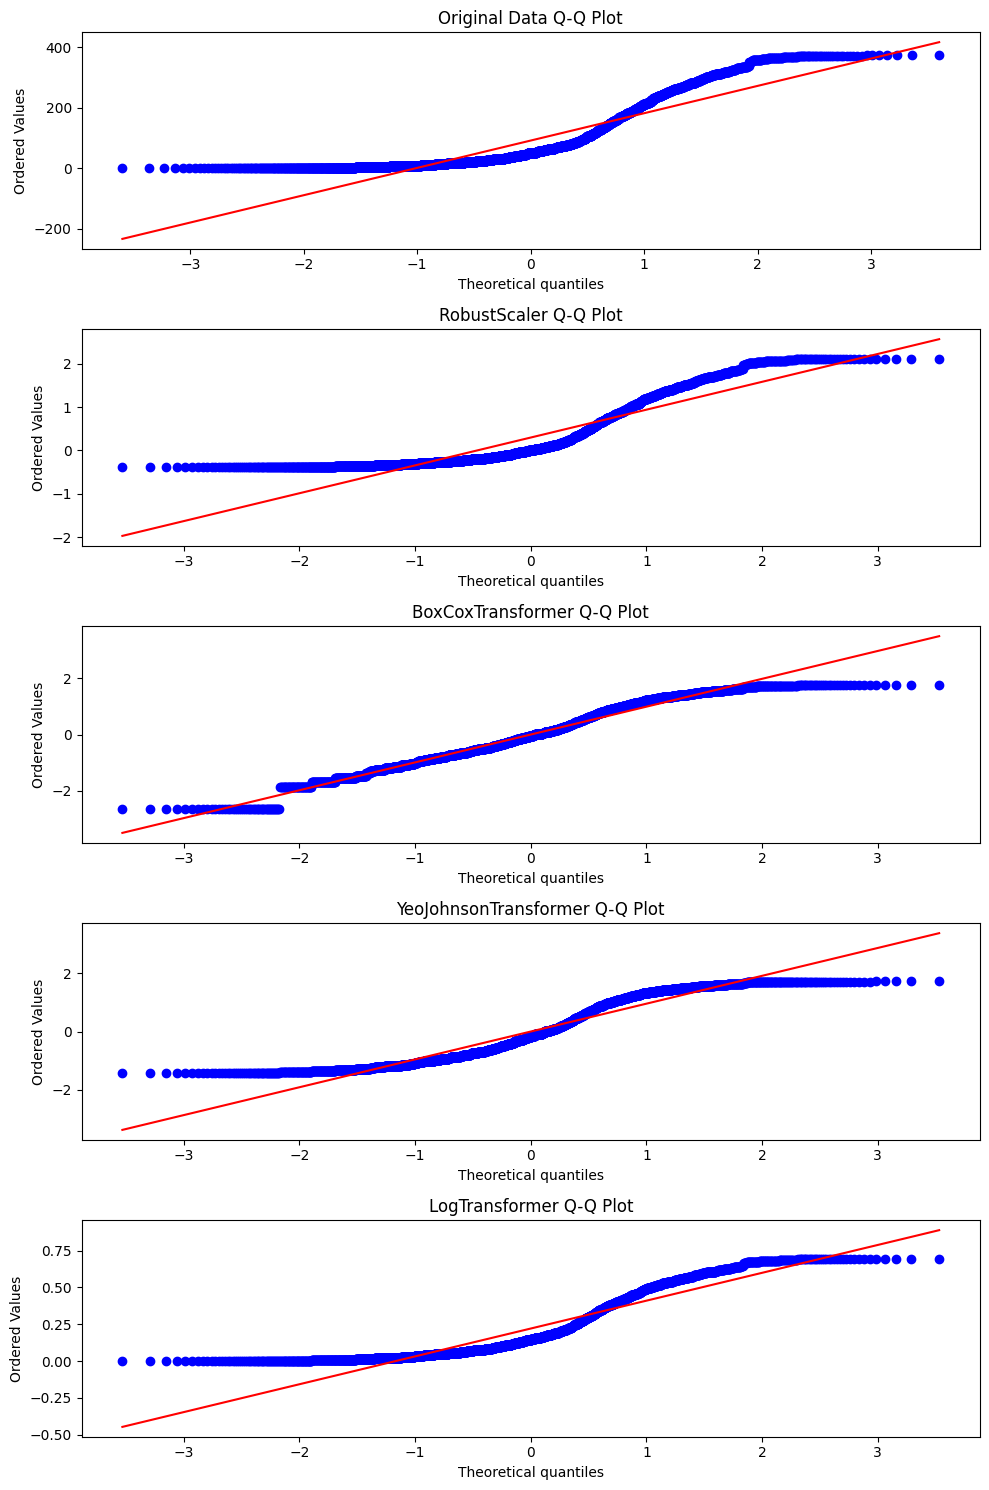

In [326]:
# Select columns for normalization
# Selecionar colunas para normalização
rfm_values = df_rfm_normalized_no_outliers[['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV']]

# Apply Min-Max Scaling
# Aplicar Min-Max Scaling
robust = RobustScaler()
boxcox =PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')
rfm_robust= robust.fit_transform((rfm_values+0.000001))
rfm_boxcox = boxcox.fit_transform((rfm_values+0.000001))
rfm_yeo_johnson = yeo_johnson.fit_transform((rfm_values+0.000001))
rfm_log = np.log1p((rfm_values+0.000001))
df_rfm_robust = pd.DataFrame(rfm_robust, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_boxcox = pd.DataFrame(rfm_boxcox, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_yeo_johnson = pd.DataFrame(rfm_yeo_johnson, columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
df_rfm_log = pd.DataFrame(rfm_log,columns=['Recency', 'Frequency', 'Monetary', 'AIO', 'Tenure', 'AOV'])
# Add the Client ID back to the Normalized DataFrame
# Adicionar o ID do Cliente de volta ao DataFrame Normalizado
#df_rfm_normalized['CustomerID'] = rfm['CustomerID']

# Histogramas 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0]) 
axes[0].set_title('Original Data') 
sns.histplot(df_rfm_robust['Recency'], bins=30, kde=True, ax=axes[1]) 
axes[1].set_title('RobustScaler') 
sns.histplot(df_rfm_boxcox['Recency'], bins=30, kde=True, ax=axes[2]) 
axes[2].set_title('BoxCoxTransformer') 
sns.histplot(df_rfm_yeo_johnson['Recency'], bins=30, kde=True, ax=axes[3]) 
axes[3].set_title('Yeo-JohnsonTransformer') 
sns.histplot(df_rfm_log['Recency'], bins=30, kde=True, ax=axes[4]) 
axes[4].set_title('LogTransformer') 
plt.tight_layout() 
plt.show()

# Gráficos Q-Q 
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15)) 
stats.probplot(rfm['Recency'], dist="norm", plot=axes[0]) 
axes[0].set_title('Original Data Q-Q Plot') 
stats.probplot(df_rfm_robust['Recency'], dist="norm", plot=axes[1]) 
axes[1].set_title('RobustScaler Q-Q Plot') 
stats.probplot(df_rfm_boxcox['Recency'], dist="norm", plot=axes[2]) 
axes[2].set_title('BoxCoxTransformer Q-Q Plot') 
stats.probplot(df_rfm_yeo_johnson['Recency'], dist="norm", plot=axes[3]) 
axes[3].set_title('YeoJohnsonTransformer Q-Q Plot') 
stats.probplot(df_rfm_log['Recency'], dist="norm", plot=axes[4]) 
axes[4].set_title('LogTransformer Q-Q Plot') 
plt.tight_layout()
plt.show()

In [327]:
#Calculate the skewness and kurtosis
# Calcular a assimetria e a curtose
#Drop the ClientID cause its not a variable to be analysed
for column in df_rfm_boxcox.columns:

    skewness = df_rfm_boxcox[column].skew()
    kurtosis = df_rfm_boxcox[column].kurtosis()
    print(column)
    print(f'Assimetria: {skewness}')
    print(f'Curtose: {kurtosis}')

Recency
Assimetria: -0.11492542092470362
Curtose: -0.6271483268994875
Frequency
Assimetria: -0.2726435701973257
Curtose: -1.7920122270173127
Monetary
Assimetria: -0.012055352362106557
Curtose: -0.4009452297292859
AIO
Assimetria: -0.14116380572603365
Curtose: 0.21690257912353017
Tenure
Assimetria: 0.12968136869139016
Curtose: -1.960037860855366
AOV
Assimetria: 0.02099693748745517
Curtose: 0.09958017169476063


In [340]:
fig = px.scatter_3d(
    df_rfm_normalized,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='ClientCluster',
    title='Interactive 3D Chart of RFM Clusters\n Gráfico 3D Interativo dos Clusters RFM'
)

fig.update_layout(scene = dict(
                     xaxis_title='Recency',
                     yaxis_title='Frequency',
                     zaxis_title='Monetary'),
                  margin=dict(l=0, r=0, b=0, t=40))

fig.show()


In [341]:
fig = px.scatter_3d(
    df_rfm_normalized,
    x='AIO',
    y='Tenure',
    z='AOV',
    color='ClientCluster',
    title='Interactive 3D Chart of RFM Clusters\n Gráfico 3D Interativo dos Clusters RFM'
)

fig.update_layout(scene = dict(
                     xaxis_title='AIO',
                     yaxis_title='Tenure',
                     zaxis_title='AOV'),
                  margin=dict(l=0, r=0, b=0, t=40))

fig.show()


#### Remodeling
#### Remodelando

Remodelando os cluster para a transformação Box-Cox sem os outliers

Calculando para k=1
Calculando para k=2
Calculando para k=3
Calculando para k=6
Calculando para k=8
Calculando para k=12
Calculando para k=10
Calculando para k=13
Calculando para k=11
Calculando para k=9
Calculando para k=4
Calculando para k=7
Calculando para k=14
Calculando para k=5
Calculando para k=16
Calculando para k=15
Calculando para k=20
Calculando para k=22
Calculando para k=19
Calculando para k=21
Calculando para k=17
Calculando para k=25
Calculando para k=23
Calculando para k=18
Calculando para k=24
Calculando para k=27
Calculando para k=26
Calculando para k=28
Calculando para k=29
Calculando para k=30
Calculando para k=40
Calculando para k=33
Calculando para k=38
Calculando para k=39
Calculando para k=31
Calculando para k=34
Calculando para k=41
Calculando para k=32
Calculando para k=37
Calculando para k=35
Calculando para k=42
Calculando para k=36
Calculando para k=43
Calculando para k=44
Calculando para k=48
Calculando para k=47
Calculando para k=45
Calculando para k=49
C

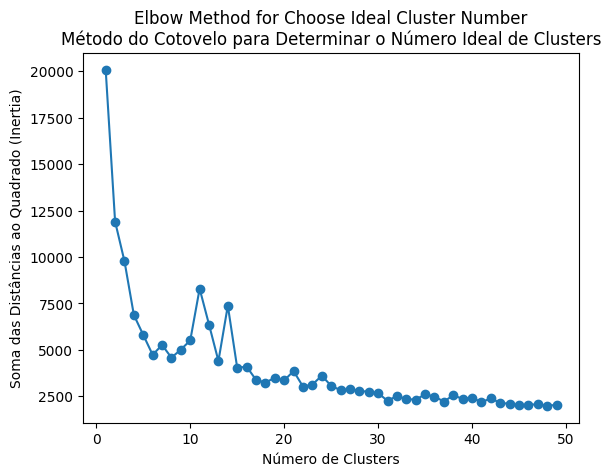

In [330]:

# Function to run K-Means and calculate inertia
# Função para rodar K-Means e calcular inercia
def calculate_inertia(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_rfm_boxcox)
    return k, kmeans.inertia_

# Elbow Method for Determining the Optimal Number of Clusters
# Método do Cotovelo para determinar o número ideal de clusters
k_range = range(1, 50,1)
sse = []
log = []

#Used ThreadPoolExecutor for paralel processing
# Usar ThreadPoolExecutor para paralelismo
with ThreadPoolExecutor(max_workers=None) as executor:
    futures = {executor.submit(calculate_inertia, k): k for k in k_range}
    for future in as_completed(futures):
        k, inertia = future.result()
        sse.append(inertia)
        log.append(f'Calculando para k={k}')
        print(f'Calculando para k={k}')  # Print para acompanhar

#Plot the chart of Elbow Technic 
# Plotar o gráfico da técnica do cotovelo
plt.plot(sorted(k_range), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das Distâncias ao Quadrado (Inertia)')
plt.title('Elbow Method for Choose Ideal Cluster Number\nMétodo do Cotovelo para Determinar o Número Ideal de Clusters')
plt.show()

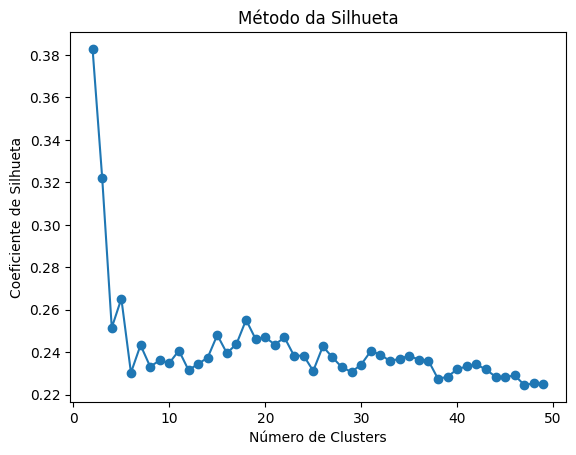

In [ ]:
silhouette_scores = []
for n_clusters in range(2, 50):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(df_rfm_boxcox)
    silhouette_avg = silhouette_score(df_rfm_boxcox, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 50), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.show()

In [402]:
model_boxcox = KMeans(n_clusters=5, random_state=42, n_init='auto')
df_rfm_boxcox['ClientCluster'] = model_boxcox.fit_predict(df_rfm_boxcox)

In [ ]:
# Garantir que o ClientCluster seja tratado como categórico
df_rfm_boxcox['ClientCluster'] = df_rfm_boxcox['ClientCluster'].astype(str)

# Criar o gráfico 3D com a paleta de cores discreta e tratando o ClientCluster como categórico
fig = px.scatter_3d(
    df_rfm_boxcox,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='ClientCluster',
    title='Interactive 3D Chart of RFM Clusters\n Gráfico 3D Interativo dos Clusters RFM',
    category_orders={"ClientCluster": sorted(df_rfm_boxcox['ClientCluster'].unique())},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [ ]:
# Garantir que o ClientCluster seja tratado como categórico
df_rfm_boxcox['ClientCluster'] = df_rfm_boxcox['ClientCluster'].astype(str)

# Criar o gráfico 3D com a paleta de cores discreta e tratando o ClientCluster como categórico
fig = px.scatter_3d(
    df_rfm_boxcox,
    x='AIO',
    y='Tenure',
    z='AOV',
    color='ClientCluster',
    title='Interactive 3D Chart of RFM Clusters\n Gráfico 3D Interativo dos Clusters RFM',
    category_orders={"ClientCluster": sorted(df_rfm_boxcox['ClientCluster'].unique())},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(
    scene=dict(
        xaxis_title='AIO',
        yaxis_title='Tenure',
        zaxis_title='AOV'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [338]:
df_rfm_boxcox[df_rfm_boxcox['ClientCluster'] == '1'].describe()

Recency   Frequency    Monetary         AIO        Tenure  \
count  340.000000  340.000000  340.000000  340.000000  3.400000e+02   
mean    -0.612880    0.767962    0.625293    0.851357 -9.429969e-01   
std      0.942150    0.273949    0.713221    0.842381  1.111859e-16   
min     -2.643961   -1.184463   -1.079571   -1.350873 -9.429969e-01   
25%     -1.206122    0.529845    0.084079    0.210441 -9.429969e-01   
50%     -0.717246    0.738296    0.582485    0.830187 -9.429969e-01   
75%     -0.043583    0.960499    1.177298    1.554748 -9.429969e-01   
max      1.722433    1.343076    2.129211    2.423602 -9.429969e-01   

              AOV  
count  340.000000  
mean     0.358813  
std      0.893957  
min     -1.776918  
25%     -0.350832  
50%      0.294220  
75%      1.012848  
max      2.613244

Without the cutting of outliers and normalization by PowerTransformer using the BoxCox method, clusters do not make sense in terms of product quantity averages or total purchase value.

Sem o corte dos outliers e a normalização pelo PowerTransformer usando o método BoxCox os cluster não fazem sentido quanto as médias de quantidade de produtos e nem valor total de compra.

### Analysis
### Análise

* Recência: Quanto mais baixa melhor

* Recency: The lower the better


* Frequência: Quanto mais alta melhor

* Frequency: The higher the better


* Monetary: Quanto mais alto melhor

* Monetary: The higher the better


* AIO: Quanto mais alto melhor
* AIO: The higher the better

* Tenure: Quanto menor melhor
* Tenure : The lower the better

* AOV: Quanto maior melhor
* AOV: The higher the better

Baixa-Alta indica que não há corte usando a variavel para estabelecer o grupo

| Cluster | Recency   | Frequency|Monetary  | AIO       | Tenure    | AOV       |
|---------|-----------|----------|----------|-----------|-----------|-----------|
| 0       | Baixa-Alta| Baixa    |Baixa     |Baixa-Alta | Baixa     | Baixa-Alta|
| 1       | Baixa-Alta| Alta     |Média-Alta|Baixa-Alta | Alta      | Baixa     |
| 2       | Baixa-Alta| Alta     |Altissima |Baixa-Alta | Alto      | Alto      |
| 3       | Baixa     |Baixa     |Baixo     |Baixo-Médio| Baixa     |Baixo-Média|
| 4       | Baixa-Alta|Baixa-Alta|Alto      |Média-Alta | Baixa     |Média-Alta |

* **<span style="color:blue">Grupo 0</span>**: Gastam pouco, com baixa frequência e de maneira espaçada. Não são churn mas não são relevantes para as vendas
* **<span style="color:red">Grupo 1</span>**: Gastam muito, com alta frequência mas assiduidade baixa, ou seja, compram frequentemente na loja mas de maneira bem espaçada no tempo.
* **<span style="color:green">Grupo 2</span>**: Gastam bastante, com frequência, mas não tem assiduidade em compras, ou seja, a frequência de compras não é espaçada igualmente durante o período de análise.
* **<span style="color:purple">Grupo 3</span>**: Gastaram pouco, com baixa frequência são clientes possivelmente churn
* **<span style="color:orange">Grupo 4</span>**: Gastam muito, compram bastante itens e com bom valor total e com assiduidade.


#### Statistical Relevance
#### Relevância Estatística

* Null Hypothesis: Group 3 customers do not buy a certain type of product or specific product more than others, that is, is there no product that leads customers to become Churn
* Hipótese Nula : Os clientes do grupo 3 não compram determinado tipo de produtos ou produto especifico mais do que outros, ou seja, não existe algum produto que leva os clientes a se tornarem Churn

In [358]:
df.drop(columns='ClientCluster', inplace=True)

In [359]:
df_merged = pd.merge(df_rfm_normalized_no_outliers[['CustomerID','ClientCluster']], df, on='CustomerID')

In [361]:
#Create the contingency table
# Cria a tabela de contingência
contingency_table = pd.crosstab(df_merged['ClientCluster'], df_merged['ProductCluster'])
#print(contingency_table)


In [ ]:
from scipy.stats import chi2_contingency
#Apply the chi-squared test
# Aplicar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Qui-Quadrado: {chi2}")
print(f"P-Valor: {p}")
print(f"Graus de Liberdade: {dof}")
print("Frequências Esperadas:")
print(expected)


Qui-Quadrado: 3212.1071923726845
P-Valor: 0.0
Graus de Liberdade: 196
Frequências Esperadas:
[[2.14694407e+02 8.03759129e+02 2.04261269e+02 7.37329387e+02
  2.16080058e+02 2.04261269e+02 4.87667668e+02 5.32905100e+02
  8.13458687e+01 9.27897164e+02 1.71494697e+02 2.32300326e+02
  3.23590279e+01 3.17884657e+01 4.93943852e+02 2.14612898e+02
  9.96935190e+02 7.29504534e+01 4.28166181e+02 3.91242655e+00
  4.79842815e+02 2.41755357e+02 2.55204324e+02 3.93117359e+02
  1.57638186e+02 6.11316649e+00 3.24405368e+01 4.79516779e+02
  2.54470744e+02 1.04355827e+03 7.64145811e+02 1.38972651e+02
  1.23078419e+01 1.82824432e+02 3.33778890e+02 2.32381835e+02
  1.68886413e+02 3.10385840e+02 3.57742503e+02 6.61852158e+01
  4.26046950e+02 8.99858107e+01 1.97659050e+02 4.50825651e+02
  3.30192499e+02 6.14577004e+01 8.03596112e+02 4.08278012e+02
  6.29574639e+02 4.56449764e+02]
 [1.70158120e+03 6.37027038e+03 1.61889236e+03 5.84377506e+03
  1.71256331e+03 1.61889236e+03 3.86505706e+03 4.22359069e+03
  6.44

In [363]:
# Filter the DataFrame to include only clients from cluster 3
# Filtrar o DataFrame para incluir apenas clientes do cluster 3
df_filtered_cluster_3 = df_merged[df_merged['ClientCluster'] == 3]

# Create the contingency table for customer cluster 3
# Criar a tabela de contingência para o cluster de clientes 3
contingency_table_cluster_3 = pd.crosstab(df_filtered_cluster_3['ClientCluster'], df_filtered_cluster_3['ProductCluster'])

#print(contingency_table)


In [364]:
#Apply the chi-squared test
# Aplica o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_cluster_3)

print(f"Qui-Quadrado: {chi2}")
print(f"P-Valor: {p}")
print(f"Graus de Liberdade: {dof}")
print("Frequências Esperadas:")
print(expected)


Qui-Quadrado: 0.0
P-Valor: 1.0
Graus de Liberdade: 0
Frequências Esperadas:
[[ 68. 207.  60. 156.  67. 115. 130. 138.  27. 226.  38.  95.  14.  11.
  187.  67. 190.  34. 153. 248.  36.  91. 132.  33.   6.  21. 243.  76.
  330. 270.  44.  11.  37.  85.  70.  91.  75. 124.   2. 111.  30.  58.
  115. 137.  10. 271. 139. 170. 115.]]


In [365]:
# Filter the DataFrame to include only clients from cluster 3
# Filtrar o DataFrame para incluir apenas clientes do cluster 3
df_filtered_cluster_3 = df_merged[df_merged['ClientCluster'] == 3]

# Create the contingency table for customer cluster 3
# Criar a tabela de contingência para o cluster de clientes 3
contingency_table_products = pd.crosstab(df_filtered_cluster_3['ClientCluster'], df_filtered_cluster_3['StockCode'])

#print(contingency_table)


In [366]:
#Apply the chi-squared test
# Aplica o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_products)

print(f"Qui-Quadrado: {chi2}")
print(f"P-Valor: {p}")
print(f"Graus de Liberdade: {dof}")
print("Frequências Esperadas:")
print(expected)


Qui-Quadrado: 0.0
P-Valor: 1.0
Graus de Liberdade: 0
Frequências Esperadas:
[[ 3.  1.  1. ...  2.  8. 24.]]


    
There is no statistical relevance to reject the null hypothesis, that is, to believe that there is some 
product or group of products that leads customers to become churn. 

Customers do not stop purchasing due to dissatisfaction with any previously purchased product. It is 
recommended to conduct this analysis every time new products are introduced for sale and periodically; if the P-Value is ever less than 0.05, it is advisable to analyze which cluster or product and remove it from the store or change the supplier.

Não a relevância estatistica para se rejeitar a hipótese nula, ou seja, acreditar que haja algum produto ou grupo de produtos que levem os clientes a se tornarem churn. 

Os clientes não deixam de comprar por descontentamento com algum produto previamente comprado. Se recomenda rodar essa análise toda vez que se inserir produtos novos para venda e periodicamente se o P-Valor alguma vez de menor que 0.05 se recomenda analisar qual cluster ou produto e retira-lo da loja ou se trocar o fornecedor.

* Null Hypothesis H₀: There is no product cluster or product that leads customers to be classified in group 0 (high sales).

* Hipótese Nula H₀: Não existe cluster de produto ou produto que leve os clientes a serem classificados no grupo 0 (alta venda). 

In [367]:
# Filter the DataFrame to include only clients from cluster 3
# Filtrar o DataFrame para incluir apenas clientes do cluster 3
df_filtered_cluster_0 = df_merged[df_merged['ClientCluster'] == 0]

# Create the contingency table for customer cluster 0
# Criar a tabela de contingência para o cluster de clientes 3
contingency_table_cluster_0 = pd.crosstab(df_filtered_cluster_0['ClientCluster'], df_filtered_cluster_0['ProductCluster'])

#print(contingency_table)


In [368]:
#Apply the chi-squared test
# Aplica o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_cluster_0)

print(f"Qui-Quadrado: {chi2}")
print(f"P-Valor: {p}")
print(f"Graus de Liberdade: {dof}")
print("Frequências Esperadas:")
print(expected)


Qui-Quadrado: 0.0
P-Valor: 1.0
Graus de Liberdade: 0
Frequências Esperadas:
[[ 247.  712.  192.  190.  211.  211.  519.  478.   79.  834.  190.  285.
    35.   30.  655.  202.  925.   63.  435.  221.  184.  269.  357.  172.
     6.   18.  593.  209. 1175.  826.  122.   22.  177.  403.  266.  189.
   357.  455.    5.  466.   77.  142.  658.  427.   58.  929.  461.  650.
   467.]]


In [369]:
# Filter the DataFrame to include only clients from cluster 0
# Filtrar o DataFrame para incluir apenas clientes do cluster 0
df_filtered_cluster_0 = df_merged[df_merged['ClientCluster'] == 0]

# Create the contingency table for customer cluster 0
# Criar a tabela de contingência para o cluster de clientes 0
contingency_table_products = pd.crosstab(df_filtered_cluster_0['ClientCluster'], df_filtered_cluster_0['StockCode'])

#print(contingency_table)


In [370]:
# Apply the chi-squared test
# Aplica o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_products)

print(f"Qui-Quadrado: {chi2}")
print(f"P-Valor: {p}")
print(f"Graus de Liberdade: {dof}")
print("Frequências Esperadas:")
print(expected)


Qui-Quadrado: 0.0
P-Valor: 1.0
Graus de Liberdade: 0
Frequências Esperadas:
[[ 5.  1.  2. ...  6. 15. 43.]]


With the results, one choose to accept H₀, there is no product group that is responsible for making a customer be in the high sales group.

Com os resultados se opta pela aceitação de H₀, não há grupo de produto que seja responsável por fazer um cliente esta no grupo de altas vendas.

* H₀: There is no product group or product within a specific period that leads a customer to be classified within the high sales group.
* H₀: Não há grupo de produto ou produto dentro de perido especifico que leve um cliente a ser classificado dentro do grupo de altas vendas.

In [371]:
df['ClientCluster'] = df_merged['ClientCluster']

In [372]:
# Filter the DataFrame to include only cluster 3 clients
# Filtrar o DataFrame para incluir apenas clientes do cluster 3
df_filtered_holiday = df[(df['ClientCluster'] == 0) & (df["Holiday"] == 1)]

# Create the Contingency Table for Customer Cluster 3
# Criar a tabela de contingência para o cluster de clientes 3
contingency_table_cluster_0 = pd.crosstab(df_filtered_holiday['ClientCluster'], df_filtered_holiday['ProductCluster'])

chi2, p, dof, expected = chi2_contingency(contingency_table_cluster_0)
print(f"P-Valor: {p}")
#print(contingency_table)



P-Valor: 1.0


In [ ]:
#Define the periods
# Definir os períodos
periods = ['Holiday', 'Holiday_week', 'Month', 'DayOfMonth', 'WeekOfMonth', 'DayOfWeek']

#Interates over the periods
# Iterar sobre os períodos
for period in periods:
    period_values = df[period].unique().tolist()
    for value in period_values:
        df_filtered = df[(df['ClientCluster'] == 0) & (df[period] == value)]

        #Check if the filter results in any data
        # Verificar se o filtro resulta em algum dado
        if df_filtered.empty:
            print(f"Nenhum dado filtrado para {period} = {value}")
            continue

        # Create the contingency table
        # Criar a tabela de contingência
        contingency_table = pd.crosstab(df_filtered['ClientCluster'], df_filtered['ProductCluster'])

        # Check if the contingency table has enough values to apply the chi-square test
        # Verificar se a tabela de contingência tem valores suficientes para aplicar o teste qui-quadrado
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            print(f"Tabela de contingência insuficiente para {period} = {value}")
            #continue

        #Apply the chi-squared test
        # Aplicar o teste qui-quadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        #Check if all expected frequencies are greater than or equal to 5
        # Verificar se todas as frequências esperadas são maiores ou iguais a 5
        if (expected >= 5).all():
            #Check p-value
            # Verificar o p-valor
            if p <= 0.05:
                print(f"Período: {period}, valor: {value}")
                print(f"P-Valor: {p}")
        else:
            print(f"Frequências esperadas insuficientes para {period} = {value}")

# Manual check for 'Holiday' = 0
# Verificação manual para 'Holiday' = 0
df_filtered_holiday = df[(df['ClientCluster'] == 0) & (df["Holiday"] == 0)]

# Check if the filter results in any data
# Verificar se o filtro resulta em algum dado
if df_filtered_holiday.empty:
    print(f"Nenhum dado filtrado para Holiday = 0")

# Create the contingency table for customer cluster 0
# Criar a tabela de contingência para o cluster de clientes 0
contingency_table_cluster_0 = pd.crosstab(df_filtered_holiday['ClientCluster'], df_filtered_holiday['ProductCluster'])

# Check if the contingency table has enough values to apply the chi-square test
# Verificar se a tabela de contingência tem valores suficientes para aplicar o teste qui-quadrado
if contingency_table_cluster_0.shape[0] < 2 or contingency_table_cluster_0.shape[1] < 2:
    print("Tabela de contingência insuficiente para Holiday = 0")
else:
    #Aply the chi-squared test
    # Aplicar o teste qui-quadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table_cluster_0)
    #Check if all expected frequencies are greater than or equal to 5
    # Verificar se todas as frequências esperadas são maiores ou iguais a 5
    if (expected >= 5).all():
        print(f"P-Valor: {p}")
    else:
        print("Frequências esperadas insuficientes para Holiday = 0")


Tabela de contingência insuficiente para Holiday = 0.0
Frequências esperadas insuficientes para Holiday = 0.0
Tabela de contingência insuficiente para Holiday = 1.0
Frequências esperadas insuficientes para Holiday = 1.0
Nenhum dado filtrado para Holiday = nan
Tabela de contingência insuficiente para Holiday_week = 0.0
Frequências esperadas insuficientes para Holiday_week = 0.0
Tabela de contingência insuficiente para Holiday_week = 1.0
Frequências esperadas insuficientes para Holiday_week = 1.0
Nenhum dado filtrado para Holiday_week = nan
Tabela de contingência insuficiente para Month = 12
Frequências esperadas insuficientes para Month = 12
Tabela de contingência insuficiente para Month = 1
Frequências esperadas insuficientes para Month = 1
Tabela de contingência insuficiente para Month = 2
Frequências esperadas insuficientes para Month = 2
Tabela de contingência insuficiente para Month = 3
Frequências esperadas insuficientes para Month = 3
Tabela de contingência insuficiente para Mont

There are no way to statically avaliate the frequency for each one of the product clusters or single product in the given periods is too low. The chi-squared would have no statical relevance.  

Não há como avaliar estatisticamente a frequência para cada cluster de produto ou produto nos determinados periodos é muito baixa. Os teste qui-quadrado não seriam estastisticamente relevantes.

In [377]:
df[df['ClientCluster'] == -1].InvoiceTotal.sum()

5145225.943000001

In [378]:
df.InvoiceTotal.sum()

8171805.3040000005

#### Remodeling
#### Remodelando

Os outliers são responsáveis por mais da metade do faturamento. Então vou só não usar eles para gerar o modelo de clusterização mas usar o modelo para classificalos também.

In [413]:
rfm_values = rfm.drop(columns=['CustomerID'])+0.000001

In [431]:
rfm_cluster = pd.DataFrame(boxcox.fit_transform(rfm_values),columns=rfm_values.columns)
rfm_cluster['ClientCluster'] = model_boxcox.predict(rfm_cluster)

In [432]:
rfm_cluster['CustomerID'] = rfm['CustomerID']

In [434]:
rfm_cluster[['ClientCluster','CustomerID']]

ClientCluster  CustomerID
0                 1     12347.0
1                 1     12348.0
2                 3     12349.0
3                 3     12350.0
4                 1     12352.0
...             ...         ...
4320              0     18280.0
4321              0     18281.0
4322              4     18282.0
4323              2     18283.0
4324              1     18287.0

[4325 rows x 2 columns]

In [437]:
df_cluster = rfm_cluster[['ClientCluster','CustomerID']]

In [451]:
# Convertendo os CustomerIDs para o mesmo tipo de dado, se necessário
df['CustomerID'] = df['CustomerID'].astype('int32')
df_cluster['CustomerID'] = df_cluster['CustomerID'].astype('int32')

# Fazer o merge dos DataFrames com base no CustomerID
df_merged = pd.merge(df, df_cluster, on='CustomerID', how='left')


C:\Users\isacs\AppData\Local\Temp\ipykernel_8448\4232863637.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [453]:
df_merged.InvoiceTotal.sum()

8171805.3040000005

In [455]:
df_merged.groupby('ClientCluster').agg({'InvoiceTotal':'sum'})

InvoiceTotal
ClientCluster              
0                110884.200
1               4401674.960
2               2188043.781
3                480844.001
4                990358.362

#### Analysis
#### Análise

In [ ]:
#Create the contigency table
# Criar a tabela de contingência
contingency_table = pd.crosstab(df_merged['ClientCluster'], df_merged['ProductCluster'])
#print("Tabela de Contingência:\n", contingency_table)

#Calculate the relative frequencies
# Calcular as frequências relativas
frequency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
#print("Tabela de Frequências Relativas:\n", frequency_table)


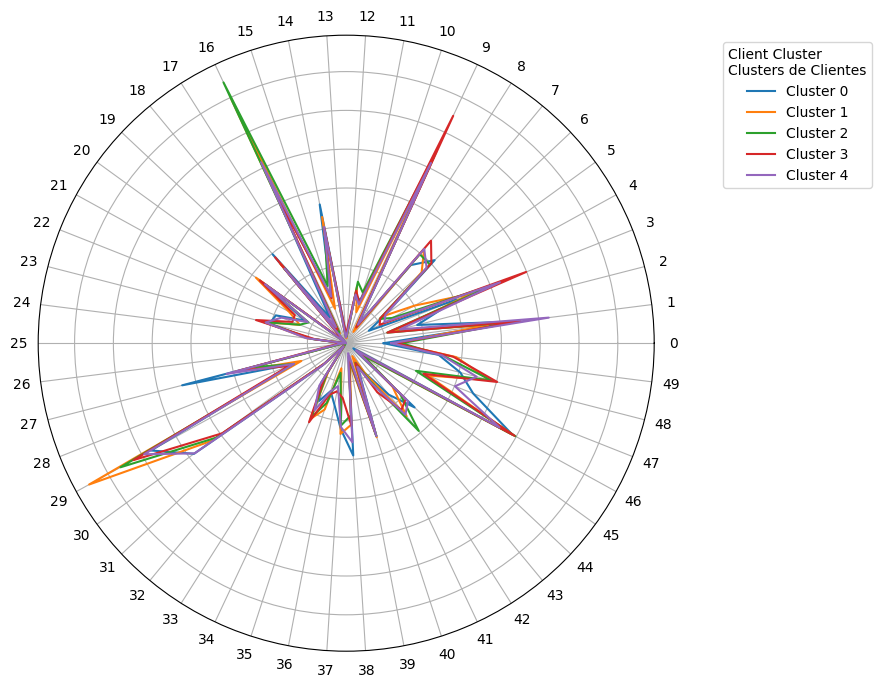

In [471]:
#Data for the radar plot
# Dados para o gráfico de radar
clusters = frequency_table.columns.tolist()
num_clusters = len(clusters)

#Angles for radar plot
# Ângulos para o gráfico de radar
angles = np.linspace(0, 2 * np.pi, num_clusters, endpoint=False).tolist()
angles += angles[:1]

#Plot configuration
# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

#Plot each client cluster dinamicily
# Plotar cada grupo de clientes dinamicamente
for client_cluster in frequency_table.index:
    freq = frequency_table.loc[client_cluster].tolist()
    data = freq + freq[:1]  # Fechar o gráfico de radar
    ax.plot(angles, data, label=f'Cluster {int(client_cluster)}')
    #ax.fill(angles, data, alpha=0.25)

#Add labels
# Adicionar labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(clusters)

# Ajust legend position
# Ajustar a posição da legenda
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1), title="Client Cluster\nClusters de Clientes")

plt.show()



In [ ]:
# Calcular o total de vendas por cluster de cliente e cluster de produto
sales_table = df_merged.pivot_table(
    values='InvoiceTotal',
    index='ClientCluster',
    columns='ProductCluster',
    aggfunc='sum',
    fill_value=0
)

# Dados para o gráfico de radar
clusters = sales_table.columns.tolist()
num_clusters = len(clusters)

# Configuração do gráfico de radar com Plotly
fig = go.Figure()

# Dicionário de cores para cada grupo
color_dict = {0: 'blue', 1: 'red', 2: 'green', 3: 'purple', 4: 'orange'}

# Plotar cada grupo de clientes dinamicamente
for client_cluster in sales_table.index:
    sales_data = sales_table.loc[client_cluster].tolist()
    sales_data += sales_data[:1]  # Fechar o gráfico de radar
    fig.add_trace(go.Scatterpolar(
        r=sales_data,
        theta=[str(c) for c in clusters] + [str(clusters[0])],
        fill='toself',
        name=f'Cluster {int(client_cluster)}',
        line=dict(color=color_dict.get(client_cluster, 'grey')),
        mode='lines+markers'
    ))

# Ajustar o layout do gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, sales_table.values.max()]
        )
    ),
    showlegend=True,
    title="Total de Vendas por Cluster de Produto e Cliente",
    legend=dict(
        title="Client Cluster\nClusters de Clientes",
        x=1.1,
        y=1
    )
)

fig.show()


#### Perguntas sobre a base e os clusters gerados
#### Questions about the database and the clusters generated

Is there a no-sale product or no-sale product cluster?

Existe produto sem venda ou cluster de produto sem venda?

In [496]:
df_merged.groupby('StockCode').agg({'InvoiceTotal':'sum'}).describe()

InvoiceTotal
count    3663.000000
mean     2230.905079
std      5420.496584
min         0.003000
25%       127.500000
50%       620.450000
75%      1993.710000
max    142264.750000

In [504]:
sales_per_product = df_merged.groupby('StockCode').agg({'InvoiceTotal':'sum'})

In [518]:
sales_per_product.sort_values(by='InvoiceTotal')

InvoiceTotal
StockCode              
PADS              0.003
84227             0.420
21268             0.840
90084             0.850
90104             0.850
...                 ...
47566         68785.230
POST          77803.960
85123A        78441.430
85099B        79480.540
22423        142264.750

[3663 rows x 1 columns]

In [529]:
low_sales_products =  sales_per_product[sales_per_product['InvoiceTotal'] < sales_per_product['InvoiceTotal'].quantile(.25)]

Are the products with the lowest sales within the products with the lowest prices?

Os produtos com as menores vendas estão dentro dos produtos com os menores preços?

In [520]:
df_merged.groupby(by='StockCode').agg({'UnitPrice':'mean'}).describe()

UnitPrice
count  3663.000000
mean      3.637800
std      14.400627
min       0.001000
25%       0.971381
50%       1.950000
75%       3.806303
max     744.147500

In [524]:
products_price = df_merged.groupby(by='StockCode').agg({'UnitPrice':'mean'})
cheap_products = products_price[products_price['UnitPrice'] < products_price['UnitPrice'].quantile(.25)]

In [538]:
cheap_products.shape[0]

916

In [549]:
cheap_products_low_sales = []
for product in low_sales_products.index.to_list():
    if product not in cheap_products.index.to_list():
        cheap_products_low_sales.append(product)


In [550]:
len(cheap_products_low_sales)

676

In [539]:
sales_per_cluster = df_merged.groupby('ProductCluster').agg({'InvoiceTotal':'sum'})
low_sales_cluster =  sales_per_cluster[sales_per_cluster['InvoiceTotal'] < sales_per_cluster['InvoiceTotal'].quantile(.25)]
cluster_price = df_merged.groupby(by='ProductCluster').agg({'UnitPrice':'mean'})
cheap_clusters = cluster_price[cluster_price['UnitPrice'] < cluster_price['UnitPrice'].quantile(.25)]

In [546]:
cheap_cluster_low_sales = []
for cluster in low_sales_cluster.index.to_list():
    if cluster  not in cheap_clusters.index.to_list():
        cheap_cluster_low_sales.append(cluster)

In [ ]:
df_merged[df_merged['StockCode'] == product]

In [560]:
#Avaliando quais produtos estão na lista dos produtos com baixa venda sem baixo preço porém não estão 
# dentro de nenhum cluster de baixa venda sem baixo preço
rejected_products = []
for product in cheap_products_low_sales:
    df_product = df_merged[df_merged['StockCode'] == product].drop_duplicates(subset='StockCode')
    cluster = df_product['ProductCluster'].values[0]
    if cluster not in low_sales_cluster.index.to_list():
        rejected_products.append(product)

In [562]:
len(rejected_products)

328

São 676 produtos que estão no 1º quartil do total de vendas mas não estão no 1º quartil de preço. O que indica baixa vendas e são 13 cluster de produtos na mesma situação. Do 676 produtos nessa condição 328 não estão em nenhum dos cluster que vendem pouco sem ter baixo valor de venda. 
Resumindo há 328 produtos que vendem mal não porque são de um tipo de produto que vende mal, mas porque são ruins de venda mesmo.

Pode se tentar uma reprecificação para esses produtos e uma campanha de marketing para os 13 cluster 

There are 676 products that are in the 1st quartile of total sales but not in the 1st quartile of price. This indicates low sales, and there are 13 product clusters in the same situation. Out of these 676 products, 328 are not part of any of the clusters that have low sales without having a low selling price.

In summary, there are 328 products that sell poorly not because they belong to a specific type of product, but simply because they perform poorly in terms of sales.

One could consider repricing these products and launching a marketing campaign for the 13 clusters.


* Is there any product that is exclusively in the basket of a certain type of customer?

* Existe algum produto que esta exclusivamente na cesta de algum tipo de cliente?


In [581]:
products_bought_by_client_cluster = df_merged.groupby('ClientCluster')['StockCode'].unique()

In [593]:
all_products = set(df_merged['StockCode'].unique())

In [609]:
products_bought_by_client_cluster.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='ClientCluster')

In [610]:
clusters_products = {}
for cluster in products_bought_by_client_cluster.index.to_list():
    clusters_products[cluster] = set(products_bought_by_client_cluster[cluster])

In [665]:
rejected_products = {}
for i in range(5):
    clusters_list = [0, 1, 2, 3, 4]
    # Cria uma cópia da lista de clusters e remove o cluster atual
    clusters_list.remove(i)
    # Produtos do cluster atual (já é um set)
    current_cluster_products = clusters_products[i]
    # Produtos dos outros clusters
    other_clusters_products = set()
    for cluster in clusters_list:
        other_clusters_products.update(clusters_products[cluster])
    # Produtos exclusivos do cluster atual
    exclusive_products = current_cluster_products - other_clusters_products
    if exclusive_products:
        rejected_products[i] = exclusive_products





In [698]:
len(rejected_products[4])

42

|Cluster|Quantidade de produtos só comprado pelo cluster |
|-------|------------------------------------------------|
|0      |6                                               |
|1      |40
|2      |100
|3      |32
|4      |42

* Os grupos de cliente tem a mesma distribuição em todos os países ?
* 
* Do the customer groups have the same distribution in all countries?

In [720]:
quant_client_cluster_country = df_merged.groupby(['Country','ClientCluster'])['CustomerID'].nunique()

In [721]:


# Quantidade de clientes por cluster em cada país
quant_client_cluster_country = quant_client_cluster_country.reset_index()
quant_client_cluster_country.columns = ['Country', 'ClientCluster', 'NumClientes']

# Total de clientes por país
total_clients_country = df_merged.groupby('Country')['CustomerID'].nunique().reset_index()
total_clients_country.columns = ['Country', 'TotalClientes']

# Juntar os DataFrames
merged_df = pd.merge(quant_client_cluster_country, total_clients_country, on='Country')

# Calcular a percentagem de cada grupo em cada país
merged_df['Percentagem'] = (merged_df['NumClientes'] / merged_df['TotalClientes']) * 100

# Exibir o resultado
#print(merged_df)


In [766]:
merged_df[merged_df['Country'] == 'United Kingdom']

Country  ClientCluster  NumClientes  TotalClientes  Percentagem
100  United Kingdom              0          662           3908    16.939611
101  United Kingdom              1          812           3908    20.777892
102  United Kingdom              2          434           3908    11.105425
103  United Kingdom              3          837           3908    21.417605
104  United Kingdom              4         1163           3908    29.759468

In [767]:
merged_df[merged_df['Country'] == 'Germany']

Country  ClientCluster  NumClientes  TotalClientes  Percentagem
42  Germany              0            4             94     4.255319
43  Germany              1           29             94    30.851064
44  Germany              2           15             94    15.957447
45  Germany              3           22             94    23.404255
46  Germany              4           24             94    25.531915

In [768]:
merged_df[merged_df['Country'] == 'France']

Country  ClientCluster  NumClientes  TotalClientes  Percentagem
37  France              0           12             87    13.793103
38  France              1           25             87    28.735632
39  France              2           10             87    11.494253
40  France              3           17             87    19.540230
41  France              4           23             87    26.436782

A Alemanha tem particularmente uma porcentagem menor de clientes no grupo 0, ou seja, que quase não compram e uma porcentagem alta do grupo 1 dos clientes que gastam muito. São 10 pontos percentuais a menos na quantidade de clientes 0 e 3, os que não gastam e os que deixam de gastar. Porém a França tem uma percentagem menor de clientes churn só 19%, entretanto 13,79 de clientes se gastam pouquíssimo.

Germany particularly has a lower percentage of customers in group 0, i.e. who hardly buy at all, and a high percentage of group 1 of customers who spend a lot. There are 10 percentage points less in the number of customers 0 and 3, those who do not spend and those who stop spending. However, France has a lower percentage of churn customers, only 19%, while 13.79 customers spend very little.